# **Data Science Project: Santander Customer Transaction Prediction Dataset**

For this Notebook we use the Santander Customer Transaction Prediction Dataset. You can find the Dataset of the Training and Test Data here: https://www.kaggle.com/code/gpreda/santander-eda-and-prediction/notebook

## **Step 1: Data Exploration**

To understand the characteristics and patterns in our dataset we first explore our dataset. By exploring the data, we can identify potential issues or biases in the data, understand the relationships between different features, and gain insights that can inform the development and evaluation of our models.

It can also help us prepare the data for machine learning by detecting and addressing any missing or incorrect values, scaling or normalizing numerical data, and encoding categorical data. This can improve the performance and accuracy of our model and reduce the risk of overfitting or other issues.

### 1.1 Packages, Libraries and Warnings

Before we start our data exploration and data analysis, we first need to install some packages and import our libraries. We also use warnings to ignore some automatic warnings that can turn out to be distracting during the analysis process.


In [3]:
# Install the necessary packages for this notebook
!pip install pandasvault

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasvault: filename=pandasvault-0.0.3-py3-none-any.whl size=6489 sha256=b5d719cab247aeca4d470a9916b6dab58971977c381faee6f5bdde7d9c66333f
  Stored in directory: /root/.cache/pip/wheels/db/7e/1d/1c3f222c14fce3383aa3a0327137c65d1485768cf80cb1d9d6
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=f555c9b2687f89af04adede335b1ccfca31e6d0a07304bde4beffce9c2863788
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pandasvault sklearn


In [4]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandasvault as pv
import warnings

In [5]:
# Use the filterwarnings function to suppress warnings (if you want to see the warnings just comment out this line of code!)
warnings.filterwarnings("ignore")

### 1.2 Load the Datasets

First we have to load our Data. On Kaggle the data set was already split into a train and test data set. We load both data sets into the jupyter notebook.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#COPY HERE the path of your "train.csv" file on your google drive.
path_train = '/content/drive/MyDrive/Datasets/train.csv'

#COPY HERE the path of your "test.csv" file on your google drive.
path_test = '/content/drive/MyDrive/Datasets/test.csv'

In [8]:
# Load the train data set
train = pd.read_csv(path_train)

# Load the test data set
test = pd.read_csv(path_test)

In [9]:
#Create a train data set with only target = 0 rows (customers not buying)
train0 = train[ train['target']==0 ].copy()

#Create a train data set with only target = 1 rows (customers buying)
train1 = train[ train['target']==1 ].copy()

### 1.3 Explore the Data

First we want to checkout the loaded data to see if everything worked and to get a first look of our train and test data sets. For that we print out the first 5 rows of the train and test data sets.

**Question 1.3:** What is the shape of our data sets? How many rows and columns are in the test and train data sets? Are there differences in the shape?

In [10]:
# Print the first 5 rows of the train data set
print(train.head(5))

# Print the first 5 rows of the test data set
print(test.head(5))

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0

In [11]:
# Get the number of rows and columns (shape) in the train data set
print("Shape of the train data set:", train.shape)

# Get the number of rows and columns (shape) in the train data set
print("Shape of the test data set:", test.shape)

Shape of the train data set: (200000, 202)
Shape of the test data set: (200000, 201)


**Answer 1.3:** Our train dataset has 200000 rows and 202 columns. Our test dataset has also 200000 rows but only 201 columns. The difference between the structure of the train and test data set is that the train data set has the "target column" which our goal is to correctly predict in the train data set! So we have a labeled dataset with the labels 0 and 1 and our goal is it to perform a classification task.

**Summary:**

*   Training set and test set have both 200000 rows/observations
*   The Training set has 202 columns / features and the test set has 201 columns /features
* The additional feature in the training set is the target feature, which is the class/label of a row which we have to predict
* the target feature is binary (0 or 1), 1 = customer transaction and 0 = no customer transaction

### 1.4 Data Types

We want to see what type of data we have in front of us.

**Question 1.4:** What type of data can we find in our train and test data sets?

In [12]:
# Get the data types of each column of the train data set
print("Data types:", train.dtypes)

# Get the data types of each column of the test data set
print("Data types:", test.dtypes)

Data types: ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object
Data types: ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object


In [13]:
# Get some more info about our train data sets
train.info()

# Get some info about our test data sets
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


**Answer 1.4:** Our train and test set contaions of the following columns:

Train set:
*   ID_code (string)
*   target (integer)
*   200 numerical variables, named from var_0 to var_199 (float)

Test set:
*   ID_code (string)
*   200 numerical variables, named from var_0 to var_199 (float)

As we can see, our two data sets contain only numerical data of type float64. The only exceptions are the "target" coumn wich is an integer of type int64 and the ID_code which contains text. The ID_code feature is an unique id of the row.It does not have any effect on the dependet target variable! All other features are anonymized and named from var_0 to var_199. So we don't know what they mean in the real world.

### 1.5 Missing Data
We want to check if there are any missing data points or null values in the data sets.

**Question 1.5:** Is there any missing data in the data sets?

In [14]:
#Reference (Preda, 2019)
#define a function that checks the total, percentage and type of every column
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [15]:
#Reference (Preda, 2019)
# Check for missing values (total and percentage) in the train data set
missing_data(train)

ID_code target    var_0    var_1    var_2    var_3    var_4    var_5  \
Total         0      0        0        0        0        0        0        0   
Percent     0.0    0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Types    object  int64  float64  float64  float64  float64  float64  float64   

           var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  \
Total          0        0  ...        0        0        0        0        0   
Percent      0.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
Types    float64  float64  ...  float64  float64  float64  float64  float64   

         var_195  var_196  var_197  var_198  var_199  
Total          0        0        0        0        0  
Percent      0.0      0.0      0.0      0.0      0.0  
Types    float64  float64  float64  float64  float64  

[3 rows x 202 columns]

In [16]:
#Reference (Preda, 2019)
# Check for missing values (total and percentage) in the test data set
missing_data(test)

ID_code    var_0    var_1    var_2    var_3    var_4    var_5  \
Total         0        0        0        0        0        0        0   
Percent     0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Types    object  float64  float64  float64  float64  float64  float64   

           var_6    var_7    var_8  ...  var_190  var_191  var_192  var_193  \
Total          0        0        0  ...        0        0        0        0   
Percent      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
Types    float64  float64  float64  ...  float64  float64  float64  float64   

         var_194  var_195  var_196  var_197  var_198  var_199  
Total          0        0        0        0        0        0  
Percent      0.0      0.0      0.0      0.0      0.0      0.0  
Types    float64  float64  float64  float64  float64  float64  

[3 rows x 201 columns]

In [17]:
#Reference (Raimondi, o. D.)
# Finding the null values if present in train data set:
if True in list(train.isnull().any()):
    print('There are some null values here!\nVar_Name; number_of_nulls:')
    print(train[train.columns[train.isnull().any()]].isnull().sum())
else:
    print('No null values in your Train Data set!')

No null values in your Train Data set!


In [18]:
#Reference (Raimondi, o. D.)
# Finding the null values if present in test data set:
if True in list(test.isnull().any()):
    print('There are some null values here!\nVar_Name; number_of_nulls:')
    print(test[test.columns[test.isnull().any()]].isnull().sum())
else:
    print('No null values in your Test Data set!')

No null values in your Test Data set!


**Answer 1.5:** There are nor any missing data points nor null values in the train and test data set! This is probably because the dataset is already processed by the Santander Bank.

### 1.6 Statistical Summary

Next we would like to get a statistical summary of the train and test data set. Maybe we can already get some valuable insights and make some observations.

**Question 1.6:** How do train and test set differ statistically? Can we make some observations?

In [19]:
# Get the statistical summary of the numerical columns of the train data set
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [20]:
# Get the statistical summary of the numerical columns of the train data set
test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

**Answer 1.6:** Some statistical observations we can make from this summary are:

1.   min, max, mean, sdt values for train and test data look quite similar
2.   mean values are distributed very differently for different feature columns.
3. compared to the mean and values the standard deviation is relatively large for both train and test sets

### 1.7 Dependent Variable (Target)



Next we want to analyse how the distribution of the values in the target column of the train data set look?

**Question 1.7:** Is the train data set balanced?

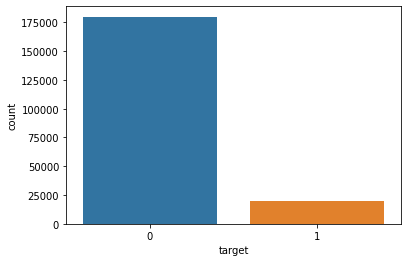

In [21]:
# Visualize the distribution of the target column
sns.countplot(x="target", data=train)
plt.show()

In [22]:
#Reference (Raimondi, o. D.)
#Calculate the percentage of 1's and 0's in target column of train data set
mylst = list(train["target"].value_counts())
zero_percent = round(float((mylst[0]/sum(mylst))*100),2)
one_percent = round(float((mylst[1]/sum(mylst))*100),2)
one = train['target'].value_counts()[1]
zero = train['target'].value_counts()[0]
print('In the train data set {zero} out of 200000 rows are Class 0 and {one} out of 200000 rows are Class 1.'.format(zero=zero, one=one))
print('The train dataset has {zero} % of target 0 and {one} % of target 1.'.format(zero=zero_percent, one=one_percent))

In the train data set 179902 out of 200000 rows are Class 0 and 20098 out of 200000 rows are Class 1.
The train dataset has 89.95 % of target 0 and 10.05 % of target 1.


**Answer 1.7:** The train data set is very imbalanced. Around 90% of our data in target has the value 0 (customer did not do a transaction), and around 10% of the data has the value 1 (customer did do the transaction). This shows that the problem in hand is a binary classification.

### 1.8 Duplicates, Duplicated Values & Unique Value Count
Next we want to check if there are any duplicates in our data sets.

**Question 1.8:** Are there any duplicates (duplicated ovservations/rows and max dublicated value per row) in the train and test data sets?

In [23]:
# Print the number of duplicated rows in the train data set
print("Number of duplicated rows:", train.duplicated().sum())

Number of duplicated rows: 0


In [24]:
# Print the number of duplicated rows in the test data set
print("Number of duplicated rows:", test.duplicated().sum())

Number of duplicated rows: 0


Check which is value appears most / is most duplicated in a certain column/variable.



In [25]:
#Reference (Preda, 2019)
#Calculate the max duplicate per column in test and train set
features = train.columns.values[2:202]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [26]:
#Reference (Preda, 2019)
#print the max duplicates per variable in descending order from train set
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False))

68       108      126      12      91       103      148  \
Feature         var_68  var_108  var_126   var_12  var_91  var_103  var_148   
Max duplicates    1084      313      305      203      66       61       59   
Value           5.0214  14.1999  11.5356  13.5545  6.9785   1.6662   4.0456   

                   71       161      25   ...      70       74       90   \
Feature         var_71  var_161   var_25  ...   var_70   var_74   var_90   
Max duplicates      54       52       41  ...        7        7        7   
Value           0.7031   5.7688  13.6723  ...  31.4509  25.6287 -15.9328   

                   96       120      199     61       187      30       136  
Feature         var_96  var_120  var_199  var_61  var_187   var_30  var_136  
Max duplicates       7        7        7       6        6        6        6  
Value           8.6561  23.1806  -3.9853 -4.3454    -3.48 -14.9372   25.892  

[3 rows x 200 columns]

In [27]:
#Reference (Preda, 2019)
#print the max duplicates per variable in descending order from test set
np.transpose((pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False))

68       126      108      12      91       103      148  \
Feature         var_68  var_126  var_108   var_12  var_91  var_103  var_148   
Max duplicates    1104      307      302      188      86       78       74   
Value           5.0197  11.5357  14.1999  13.5546  6.9939   1.4659   4.0004   

                    161      25      71   ...      70       120      176  \
Feature         var_161   var_25  var_71  ...   var_70  var_120  var_176   
Max duplicates       69       60      60  ...       14       14       14   
Value            5.7114  13.5965  0.5389  ...  26.1051  37.0676  -2.0551   

                    61       187      102      74       136      45      54   
Feature          var_61  var_187  var_102   var_74  var_136   var_45  var_54  
Max duplicates       14       14       14       13       13       13      13  
Value          -11.0639   0.1931   18.272  16.5129   9.7635 -15.5899  6.0151  

[3 rows x 200 columns]

In [29]:

#Reference (Kuriminisetty,2021)
#Counting the uniique values per feature, droping target cariable and sorting it per unique number count for test and train set
df_train_unique = train.agg(['nunique']).transpose().sort_values(by='nunique')
df_test_unique = test.agg(['nunique']).transpose().sort_values(by='nunique')
df_uniques = df_train_unique.drop('target').reset_index().merge(df_test_unique.reset_index(), how='left', right_index=True, left_index=True)
df_uniques.drop(columns=['index_y'], inplace=True)
df_uniques.columns = ['Feature', 'Training Set Unique Count', 'Test Set Unique Count']

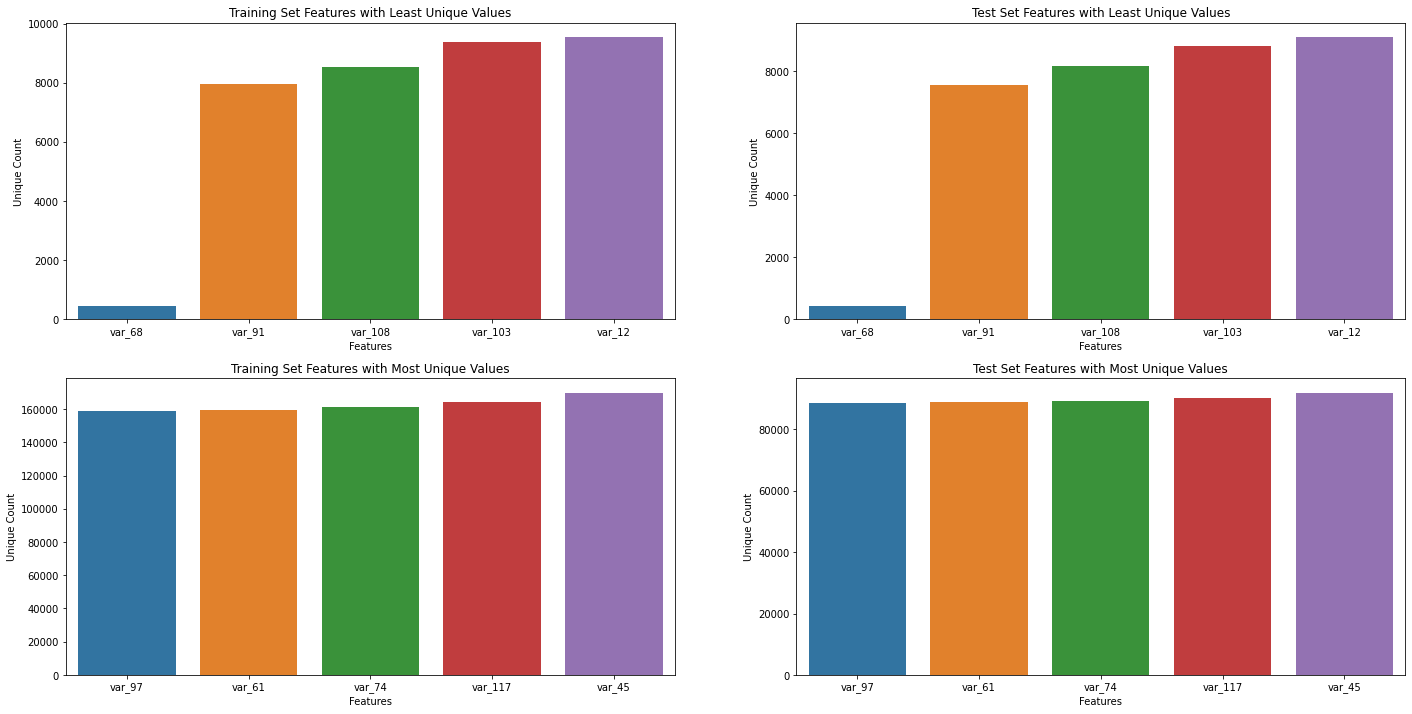

In [30]:
#Reference (Kuriminisetty,2021)
#plotting and showing the barplots for unique number count
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(24, 12))

sns.barplot(x=df_train_unique.index[1:6], y="nunique", data=df_train_unique[1:].head(), ax=axs[0][0])
sns.barplot(x=df_test_unique.index[:5], y="nunique", data=df_test_unique.head(), ax=axs[0][1])
sns.barplot(x=df_train_unique.index[-6:-1], y="nunique", data=df_train_unique[-6:-1].tail(), ax=axs[1][0])
sns.barplot(x=df_test_unique.index[-6:-1], y="nunique", data=df_test_unique[-6:-1].tail(), ax=axs[1][1])

for i in range(2):
    for j in range(2):        
        axs[i][j].set(xlabel='Features', ylabel='Unique Count')
        
axs[0][0].set_title('Training Set Features with Least Unique Values')
axs[0][1].set_title('Test Set Features with Least Unique Values')
axs[1][0].set_title('Training Set Features with Most Unique Values')
axs[1][1].set_title('Test Set Features with Most Unique Values')

plt.show()

**Answer 1.8:** There are no duplicated rows which is good. But there are certainly duplicated values per individual rows. We can observe that the same variables in train and test set have the most duplicates but the value is different but close which is an interesting pattern. Another interesting pattern in our data is that every feature in the training set exhibits a higher number of unique values compared to the features in the test set. As the number of unique values in a feature increases, the difference between the training set's and test set's unique value counts also increases. 

### 1.9 Feature Value Distribution

**Question 1.9:** How does the value distribution for the individual features look like?

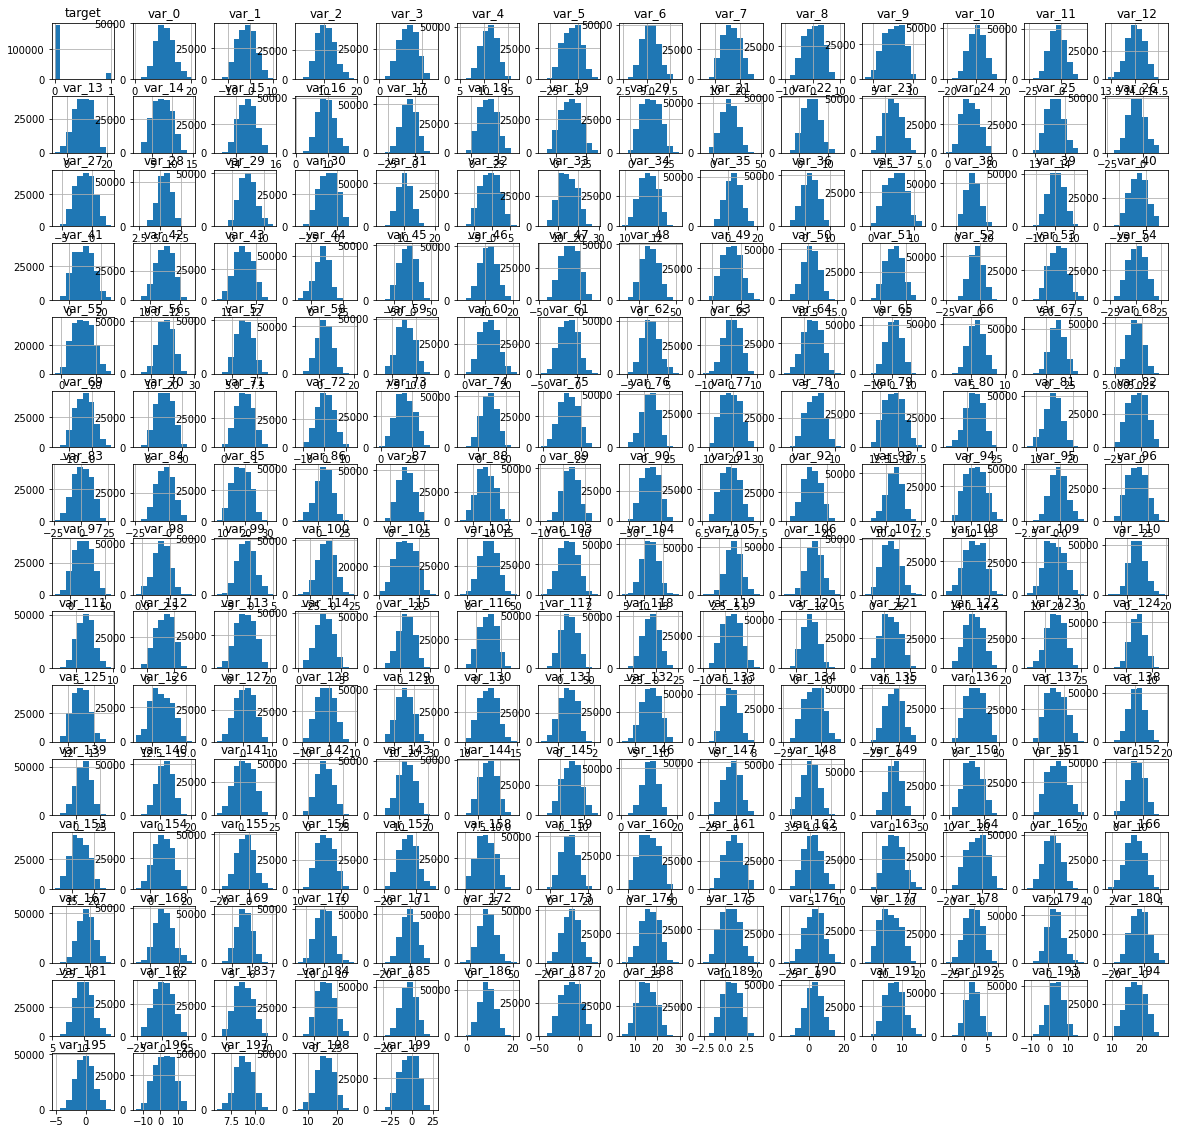

In [ ]:
# Visualize the distribution of each numerical column of the train dataset in a histogram
train.hist(figsize=(20, 20))
plt.show()

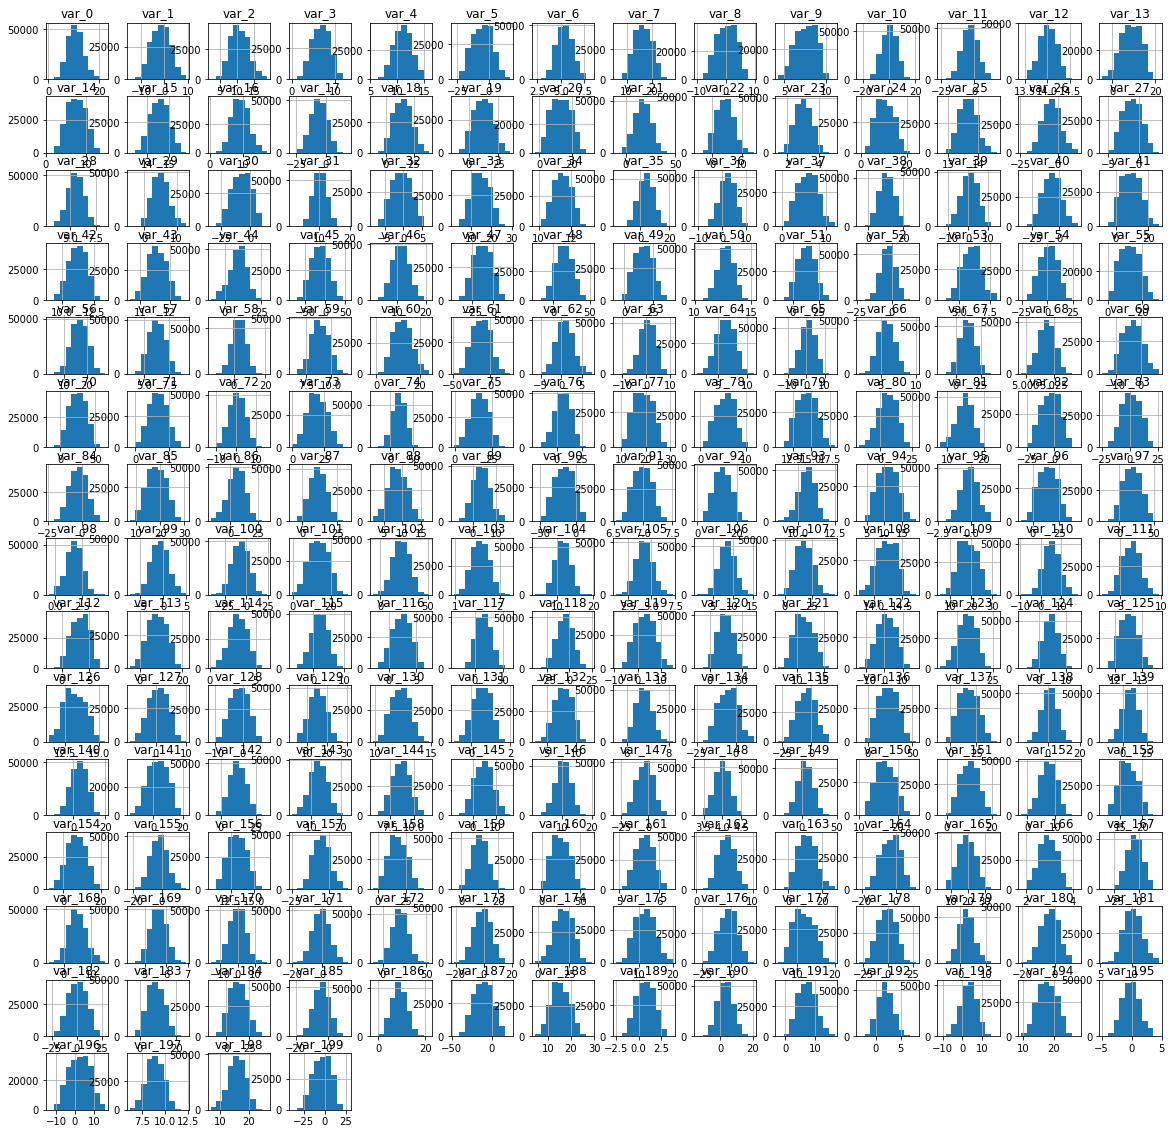

In [ ]:
# Visualize the distribution of each numerical column of the test dataset in a histogram
test.hist(figsize=(20, 20))
plt.show()

In [ ]:
#Reference (Raimondi, o. D.)
# putting all the df colname in a list
dfcols = list(train.columns)

# exculdig target and index columns
variables = dfcols[2:]

# splitting the list every n elements so there are always 20 boxplots in one graphic:
n = 20
chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

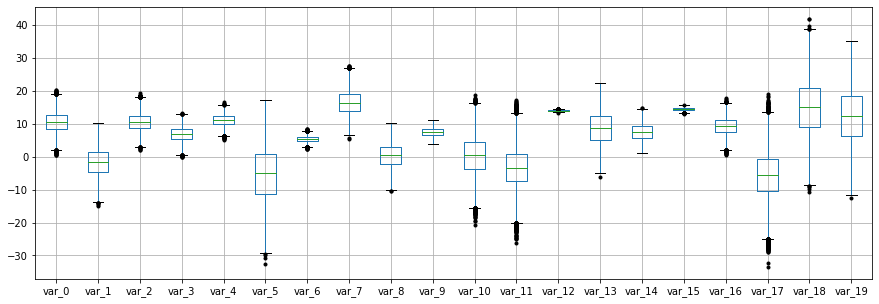

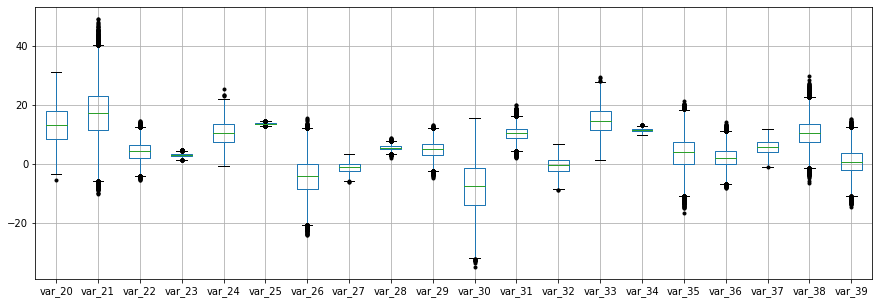

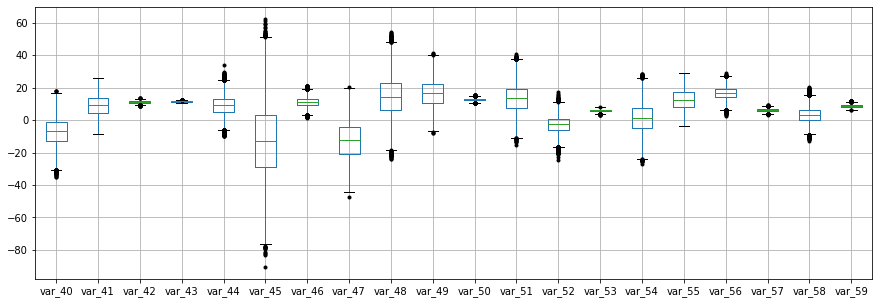

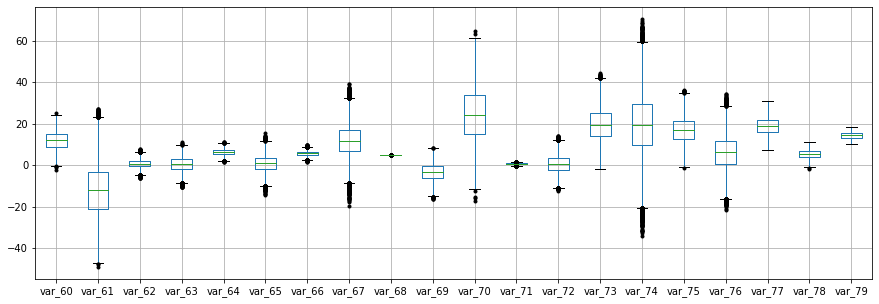

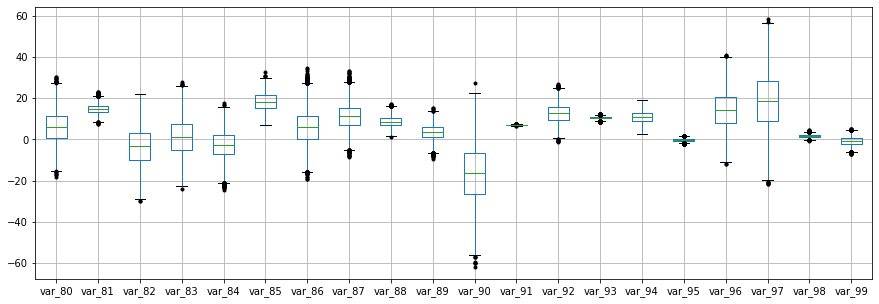

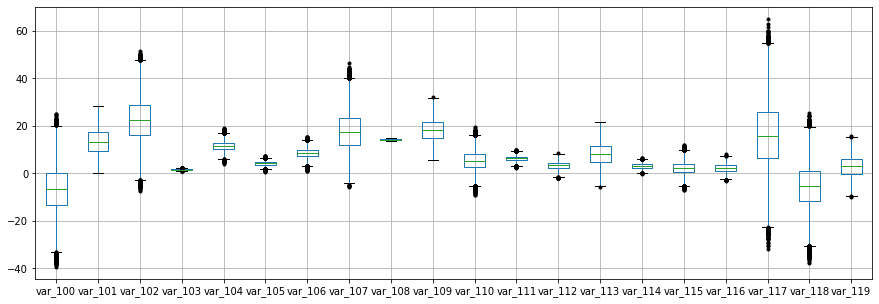

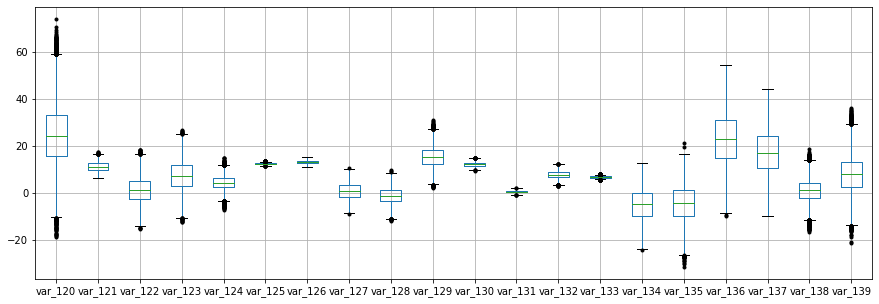

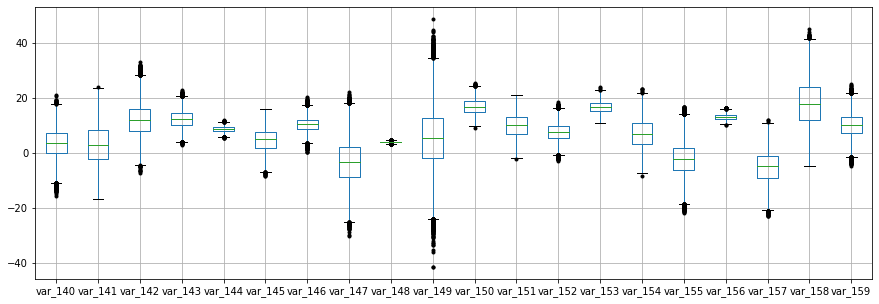

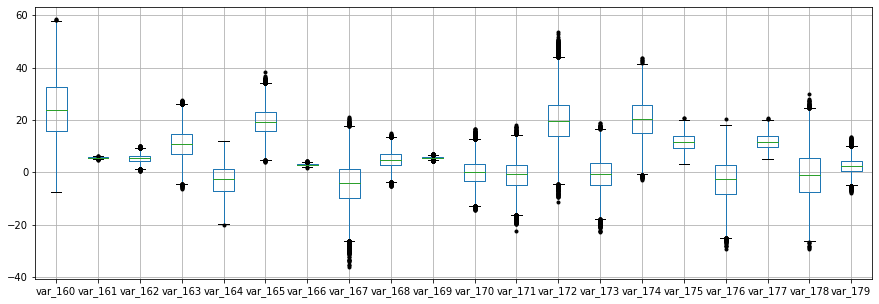

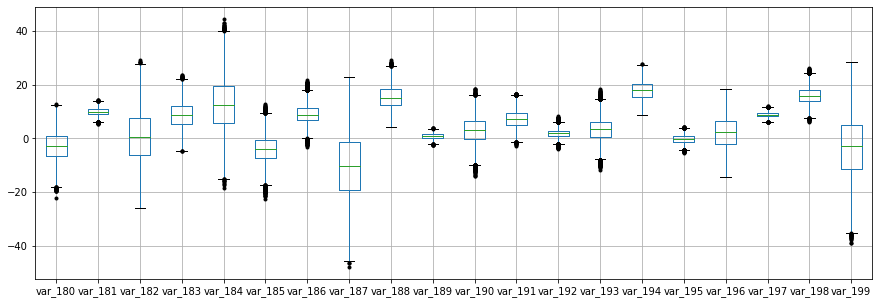

In [ ]:
#Reference (Raimondi, o. D.)
# displaying a boxplot graphic for every 20 columns:
for i in chunks:
    plt.show(train.boxplot(column = i, sym='k.', figsize=(15,5)))

**Answer 1.9:** The value distribution for the individual features is mostly closely/relatively to a normal distribution. As we already could say in 1.6 and see know form the boxplots the mean values, standard deviation & percentiles are distributed very differently for different feature columns.

### 1.10 Closer Look: Value Distribution Comparison (0, 1, & Test Data)

**Question 1.10:** Does the value distribution in the indvidual features differ from the buyers, non-buyers and in the test data?

In [ ]:
#Reference (Raimondi, o. D.)
# choose a column index from 0 - 199
index = 0

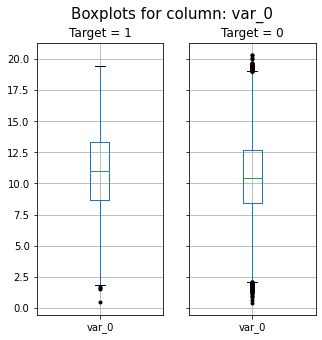

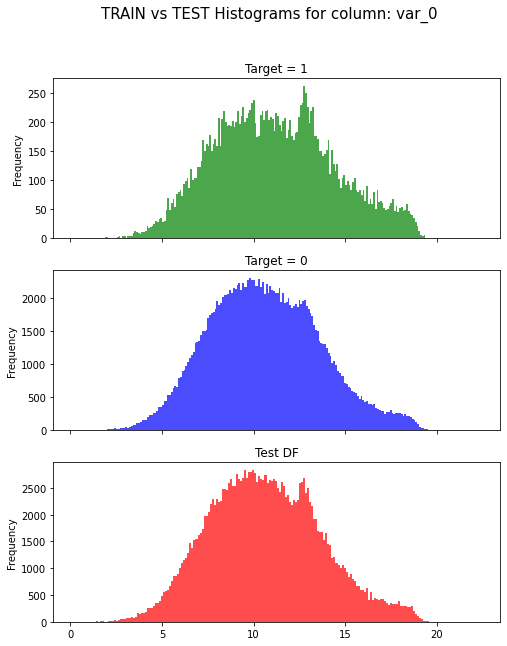

In [ ]:
#Reference (Raimondi, o. D.)
# displaying boxplots for the selected column:
fig1, axes1 = plt.subplots(ncols = 2, sharey = True, figsize=(5,5))

# boxplot only for records with target = 1
ax1 = train.loc[train["target"] == 1].boxplot(column = variables[index], ax=axes1[0], sym='k.')
ax1.set_title('Target = 1')

# boxplot only for records with target = 0
ax2 = train.loc[train["target"] == 0].boxplot(column = variables[index], ax=axes1[1], sym='k.')
ax2.set_title('Target = 0')

fig1.suptitle("Boxplots for column: " + str(variables[index]), fontsize=15)
plt.show()

#displaying histograms for the selected column:
fig2, axes2 = plt.subplots(nrows = 3, sharex = True, figsize=(8,10))

# histogram only for records with target = 1
ax1 = train.loc[train["target"] == 1][variables[index]].plot.hist(ax=axes2[0], bins=200, color='green', alpha=0.7)
ax1.set_title('Target = 1')

# histogram only for records with target = 0
ax2 = train.loc[train["target"] == 0][variables[index]].plot.hist(ax=axes2[1], bins=200, color='blue', alpha=0.7)
ax2.set_title('Target = 0')

#TEST DF
ax3 = test.loc[:][variables[index]].plot.hist(ax=axes2[2], bins=200, color='red', alpha=0.7)
ax3.set_title('Test DF')

fig2.suptitle("TRAIN vs TEST Histograms for column: " + str(variables[index]), fontsize=15)
plt.show()

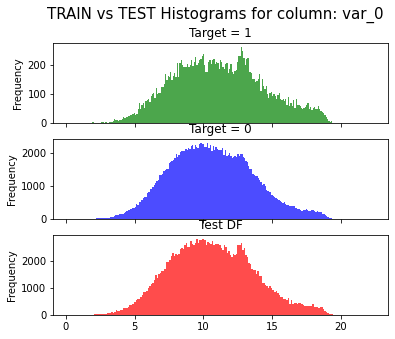

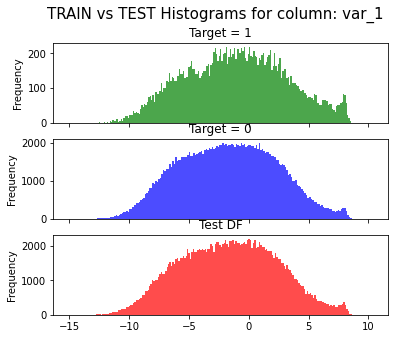

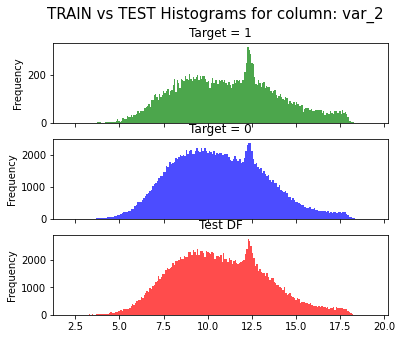

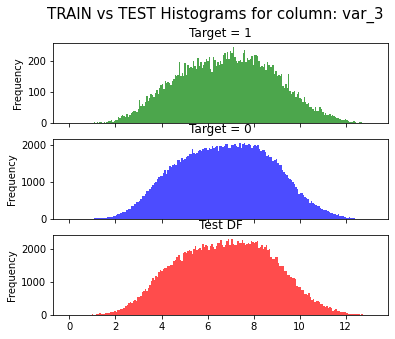

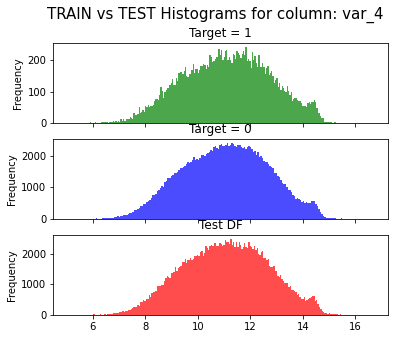

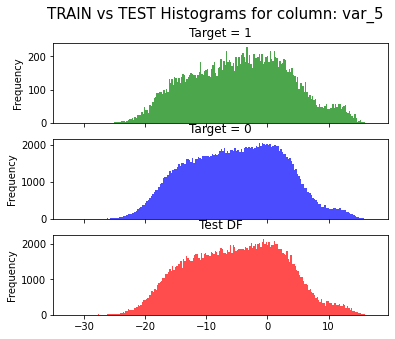

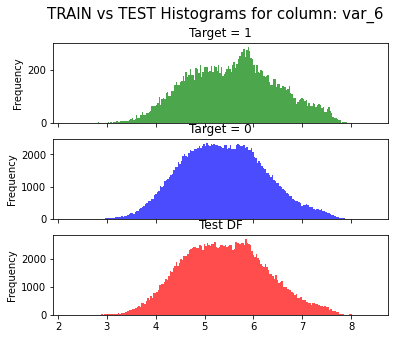

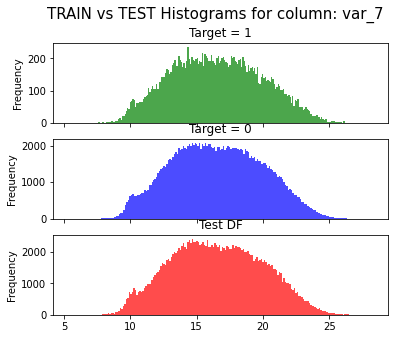

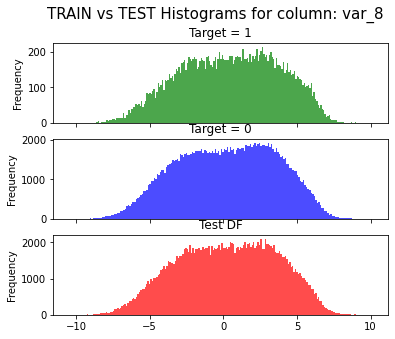

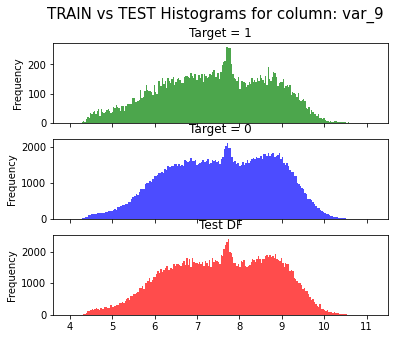

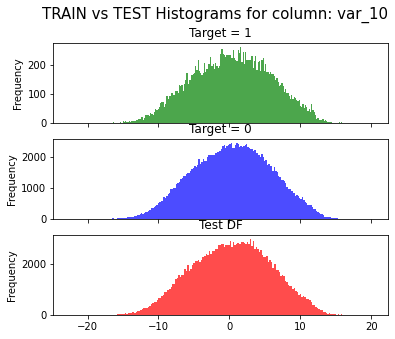

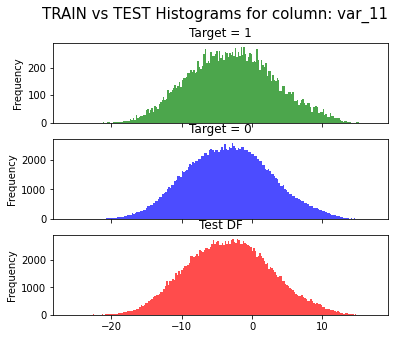

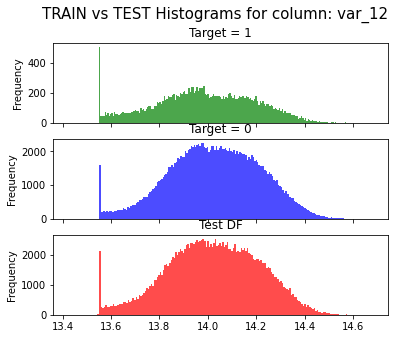

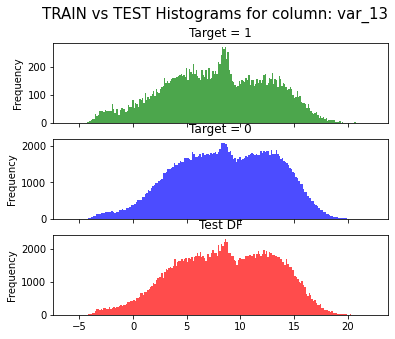

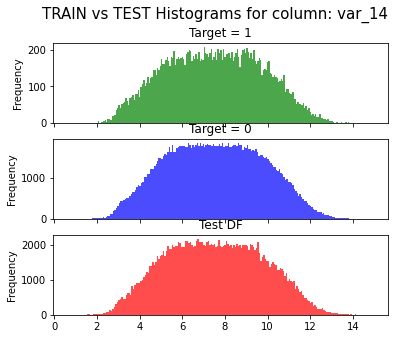

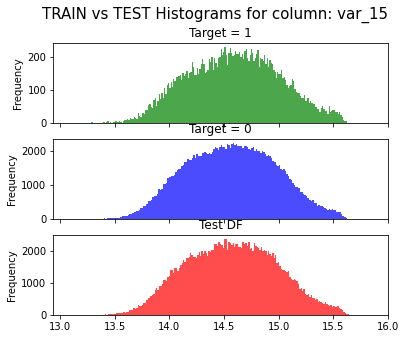

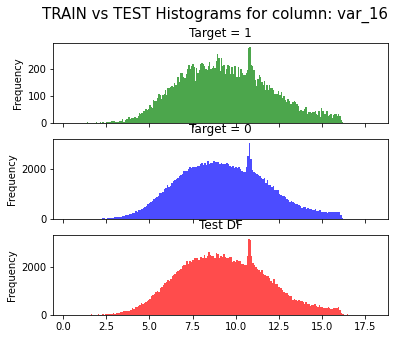

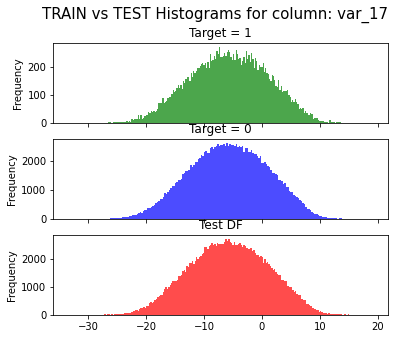

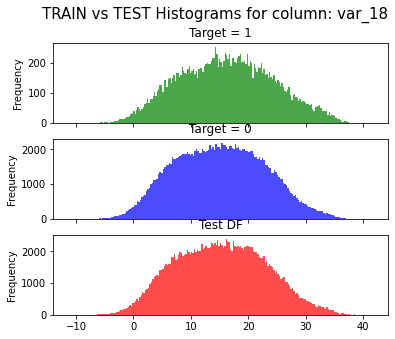

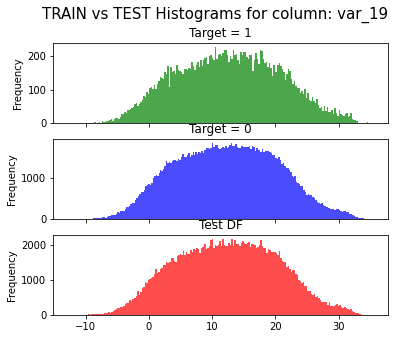

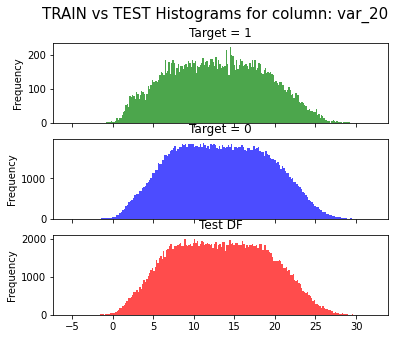

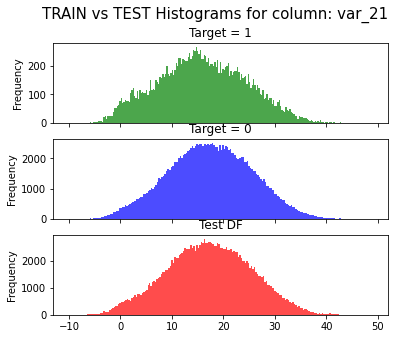

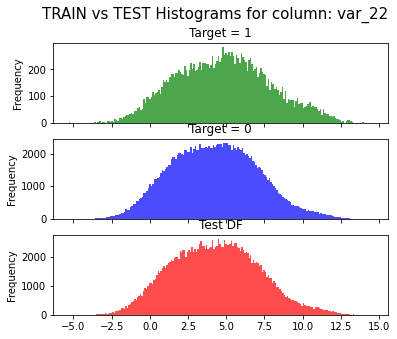

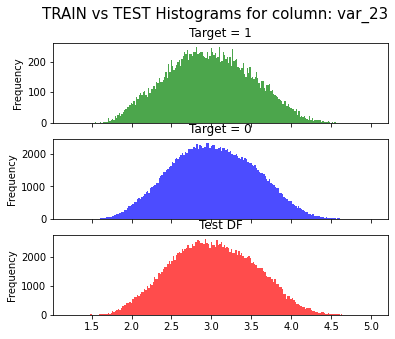

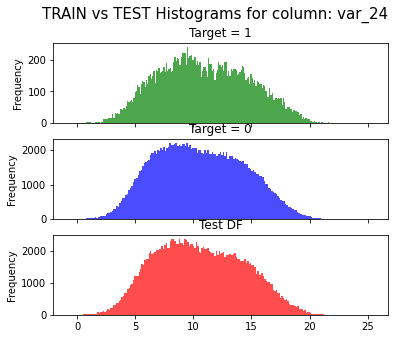

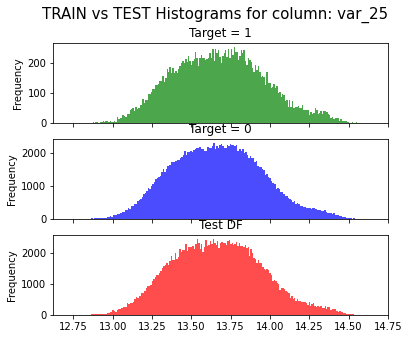

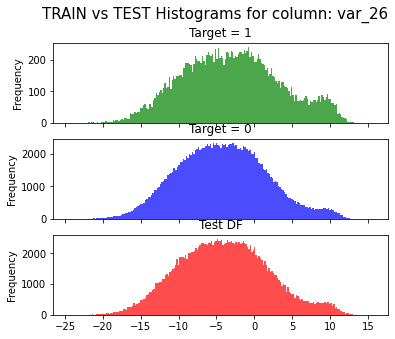

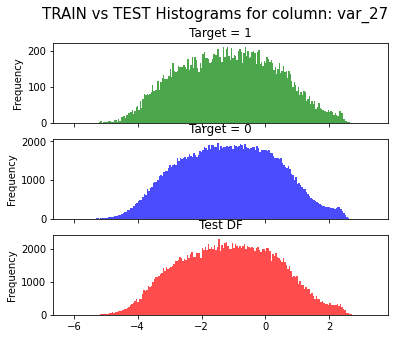

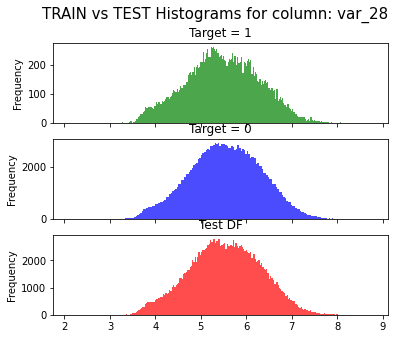

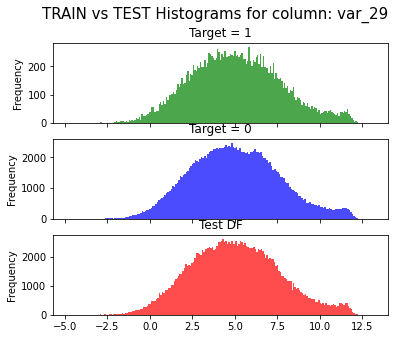

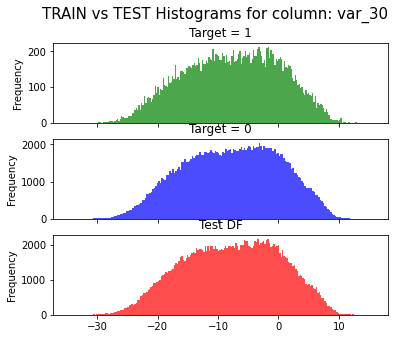

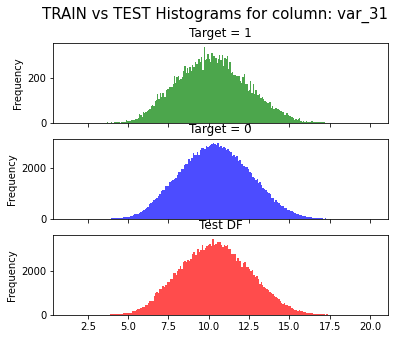

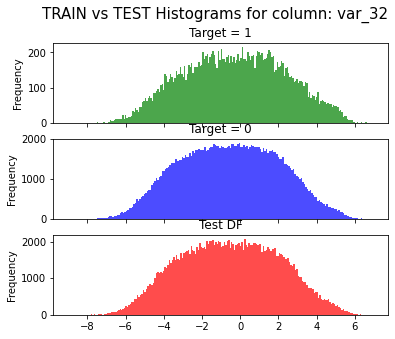

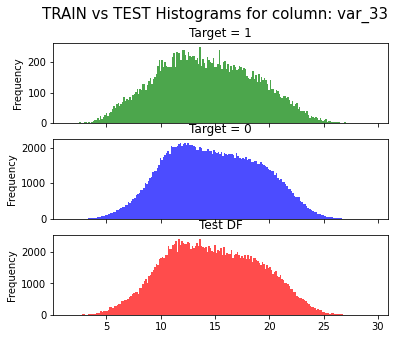

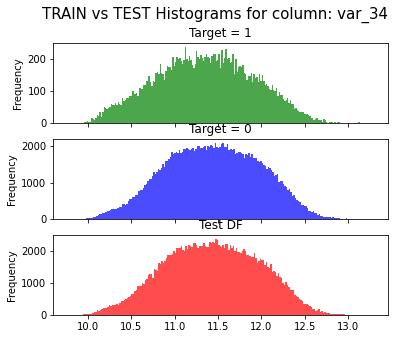

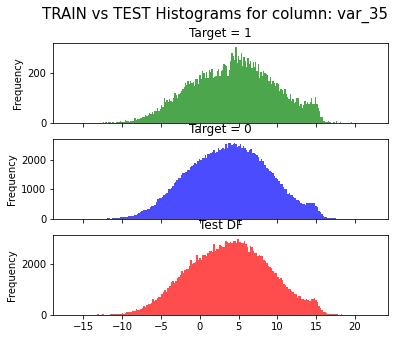

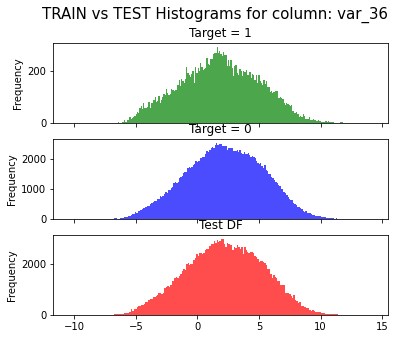

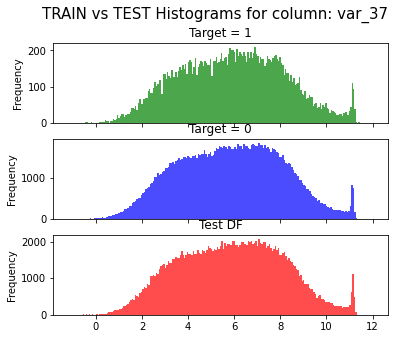

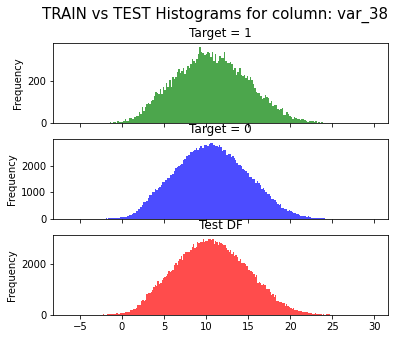

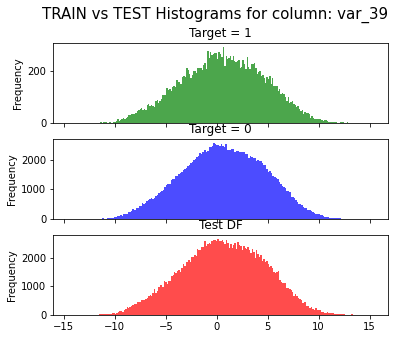

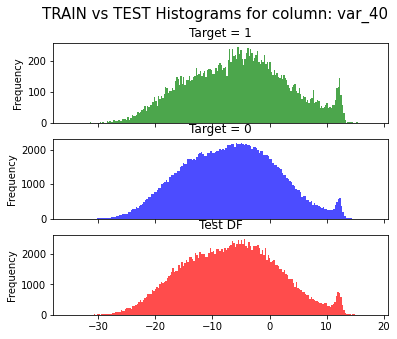

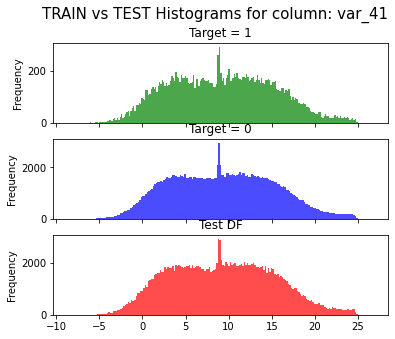

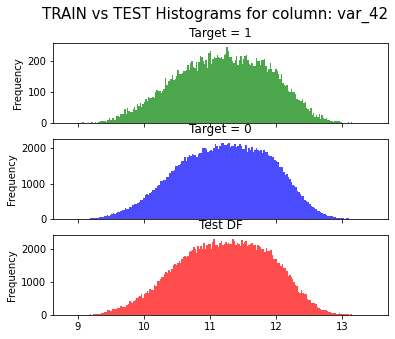

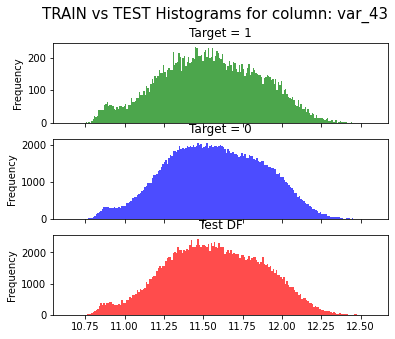

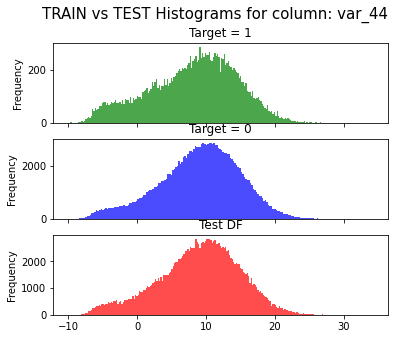

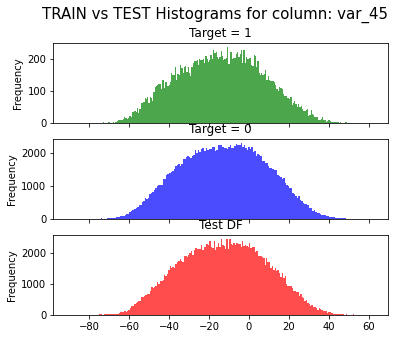

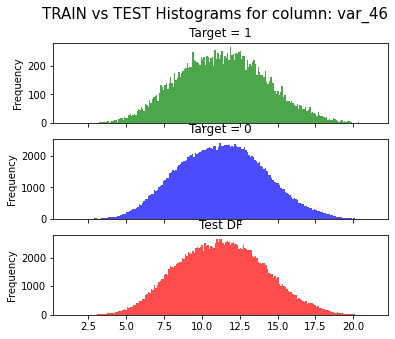

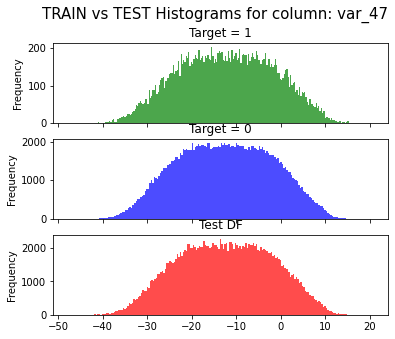

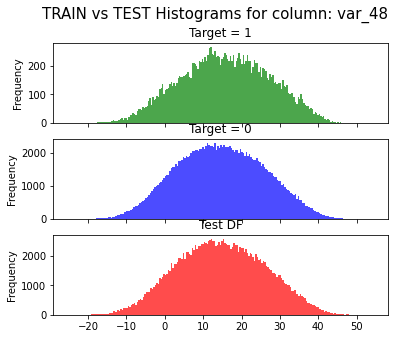

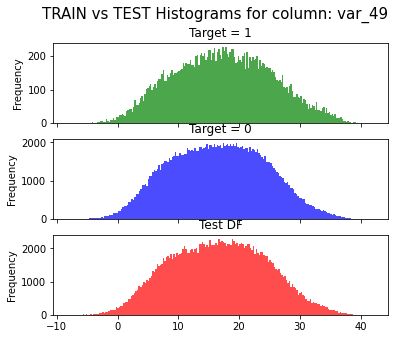

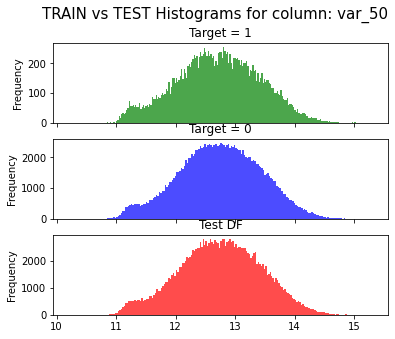

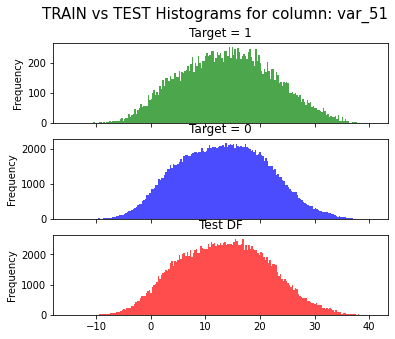

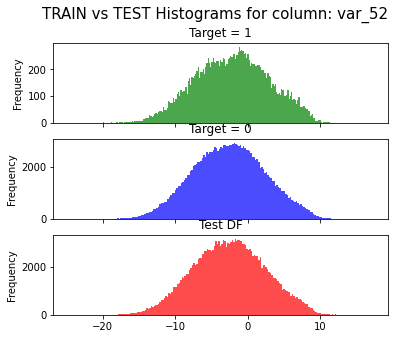

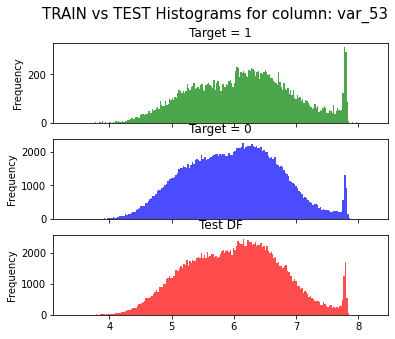

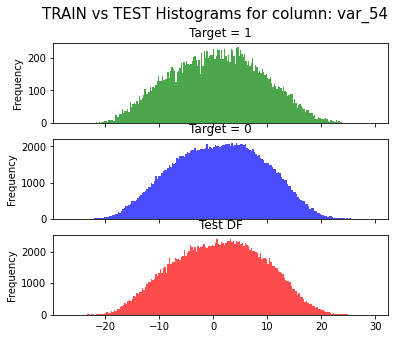

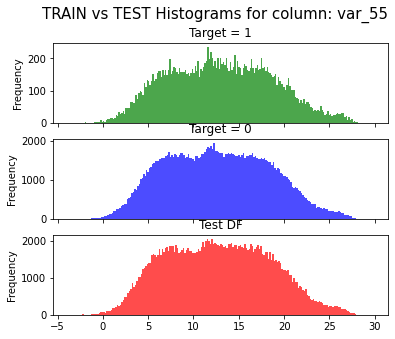

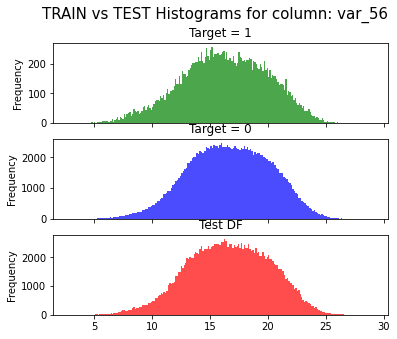

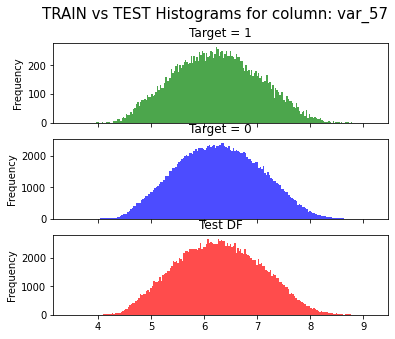

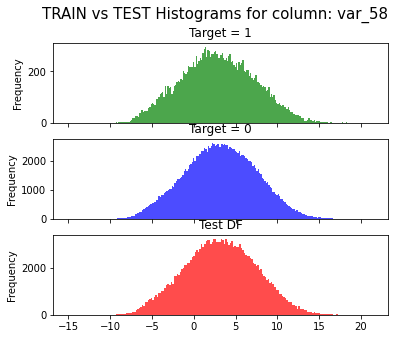

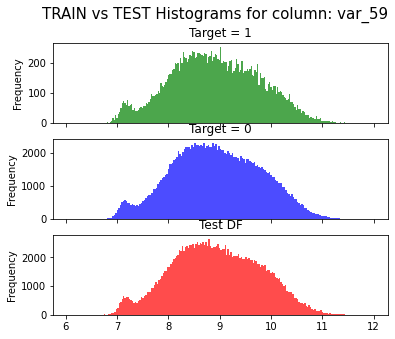

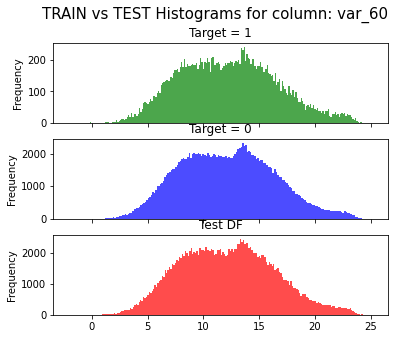

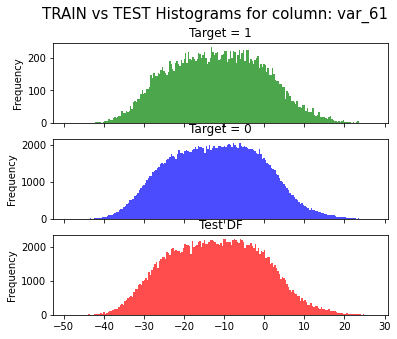

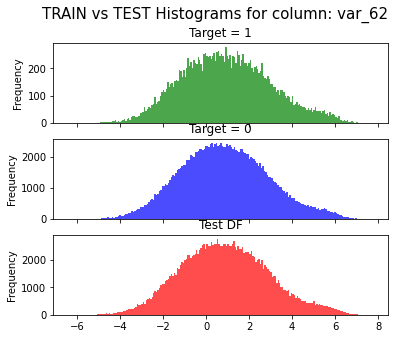

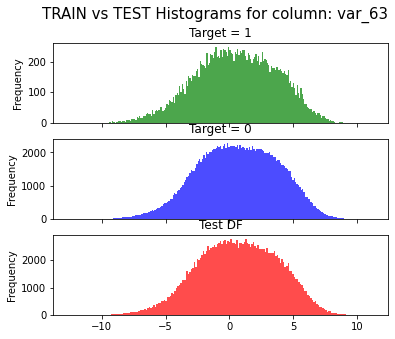

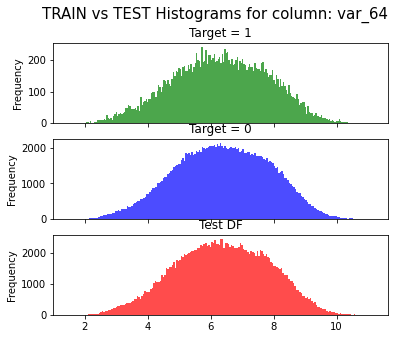

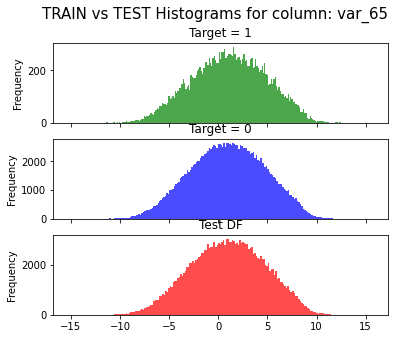

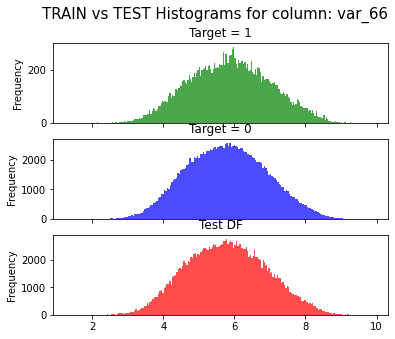

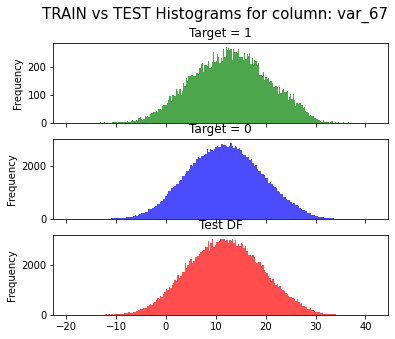

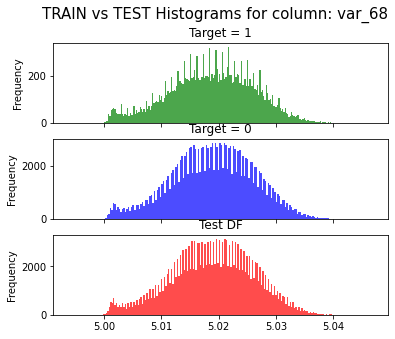

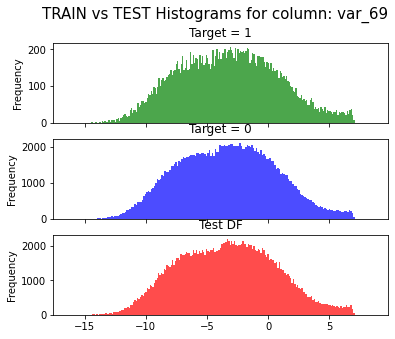

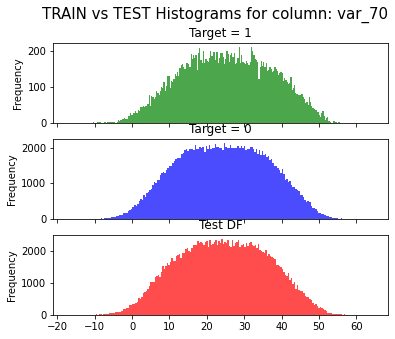

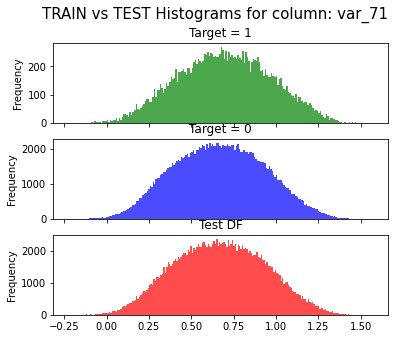

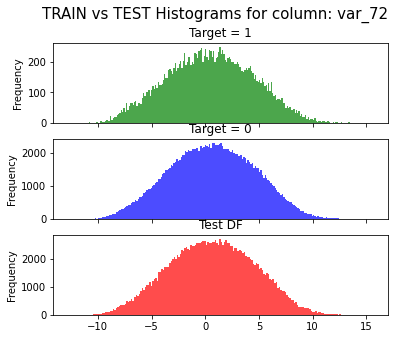

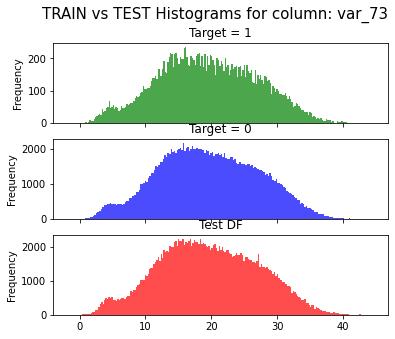

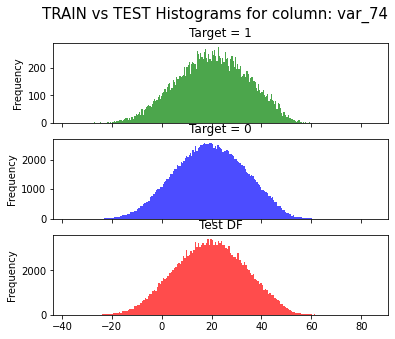

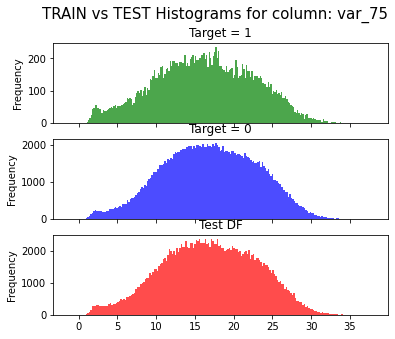

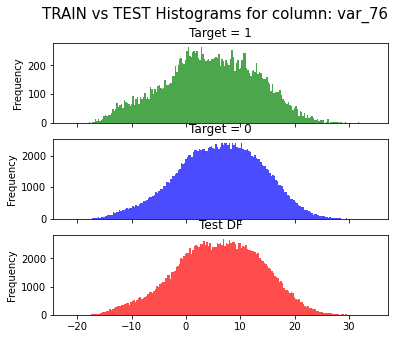

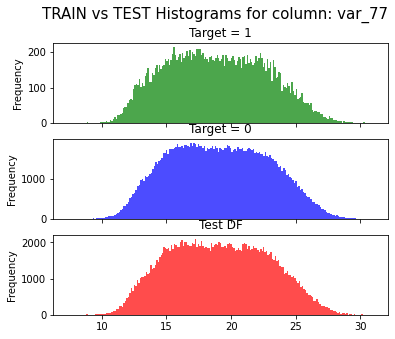

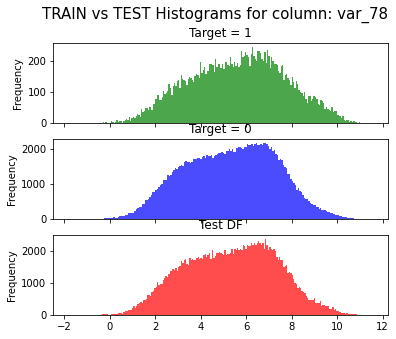

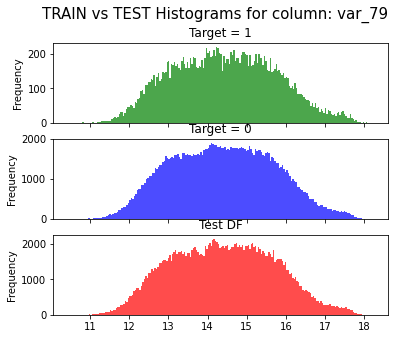

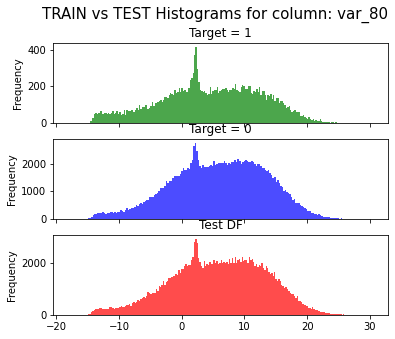

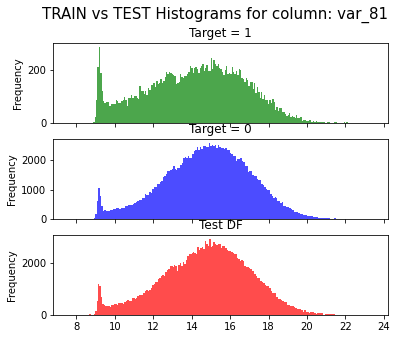

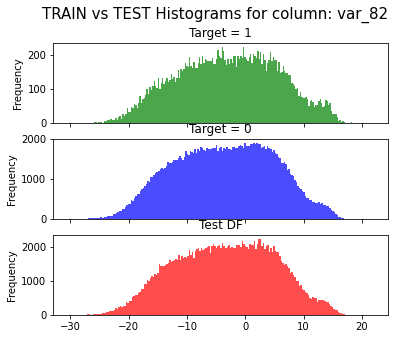

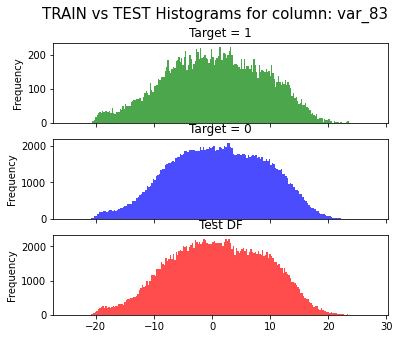

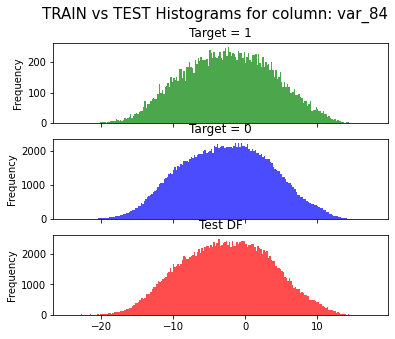

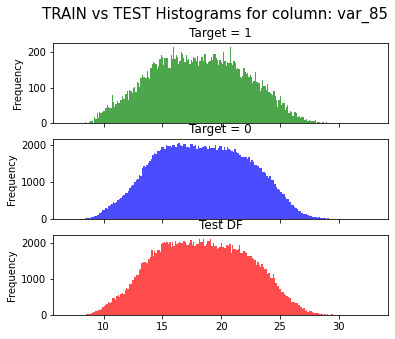

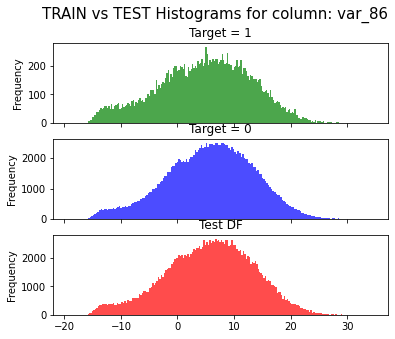

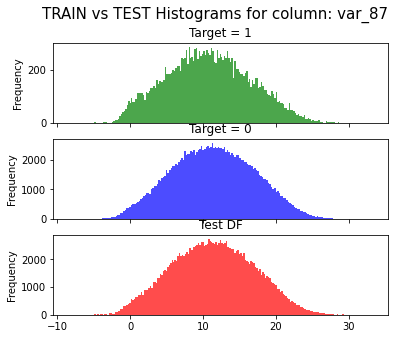

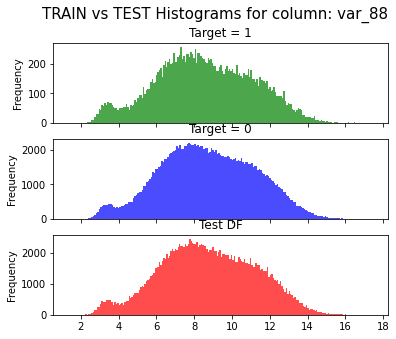

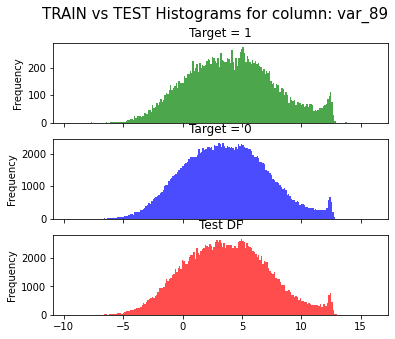

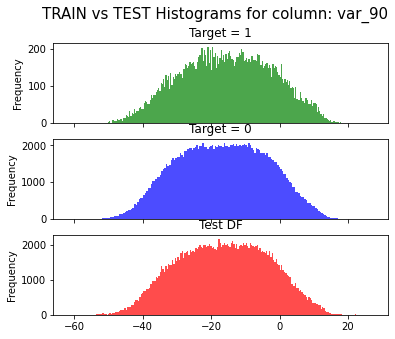

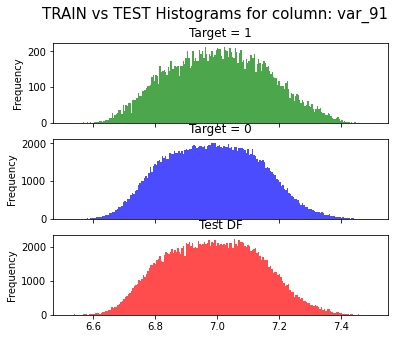

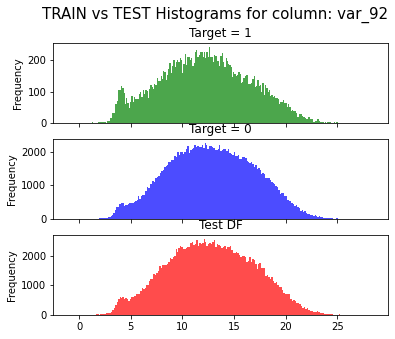

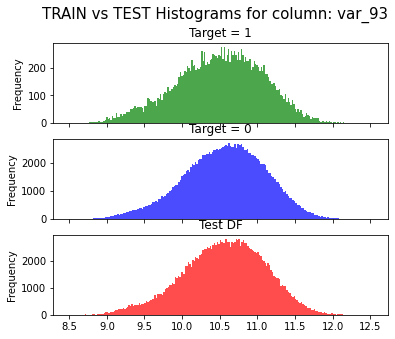

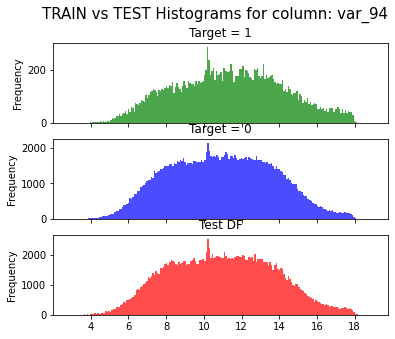

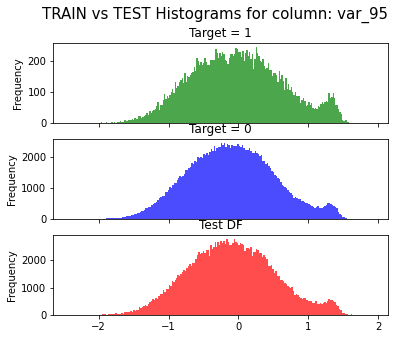

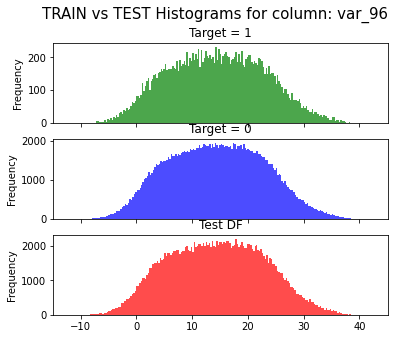

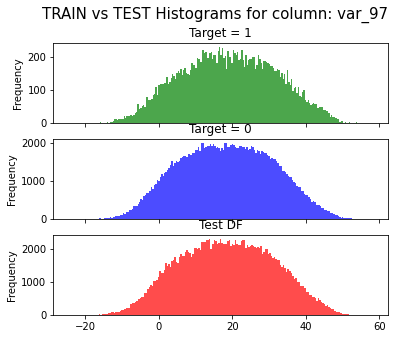

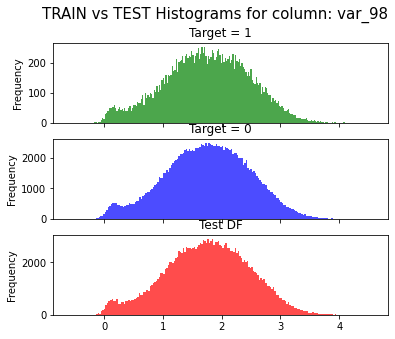

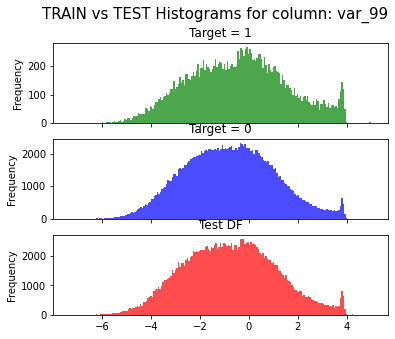

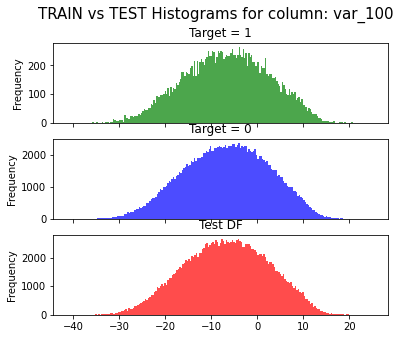

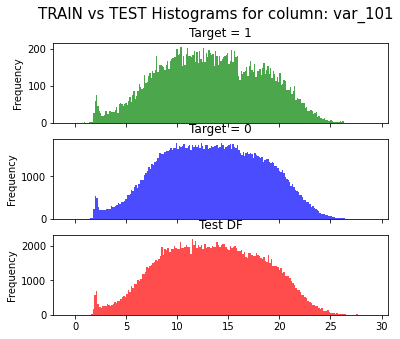

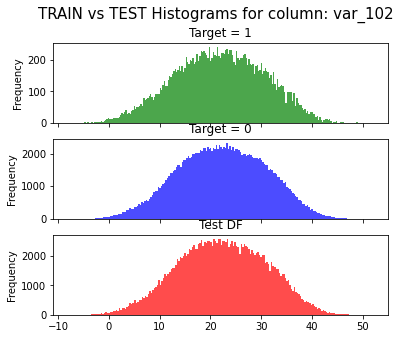

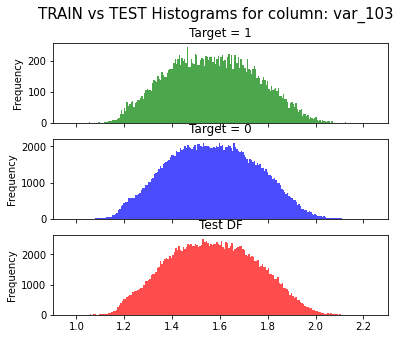

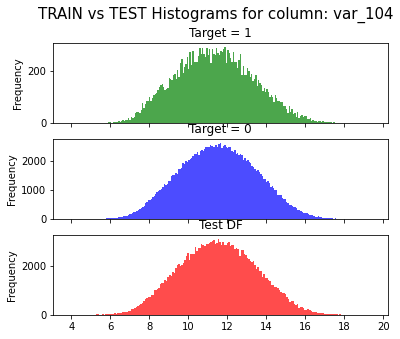

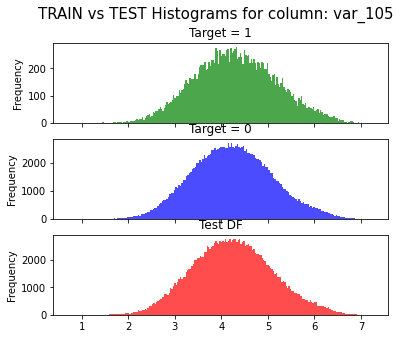

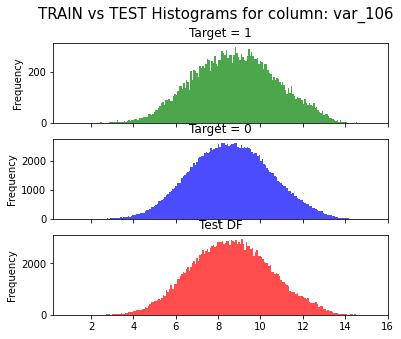

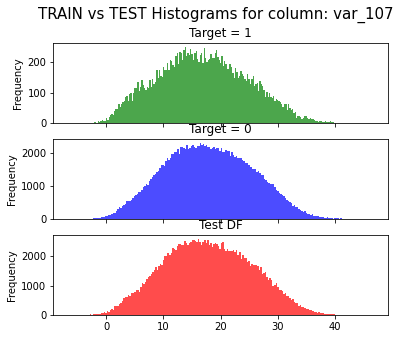

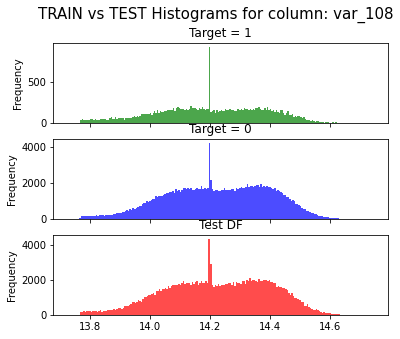

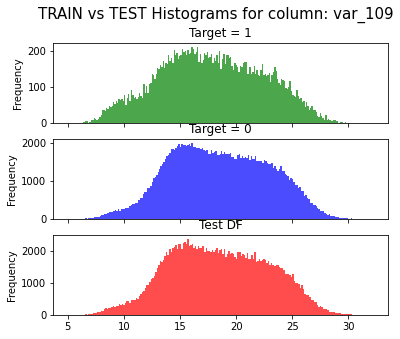

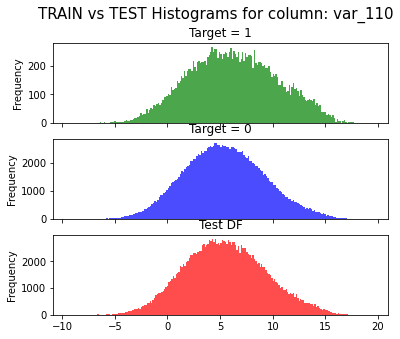

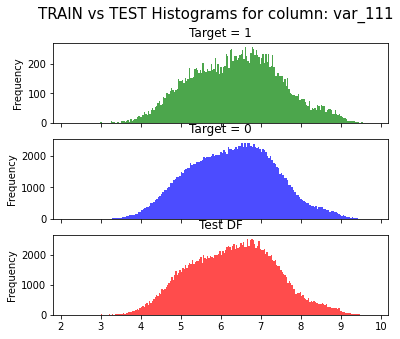

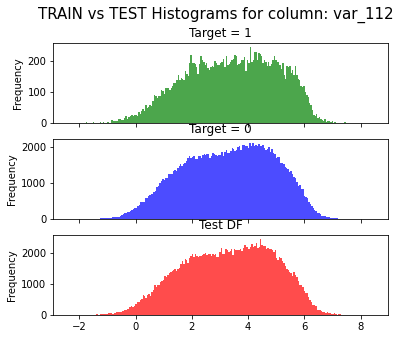

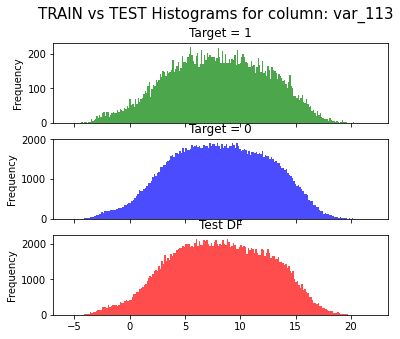

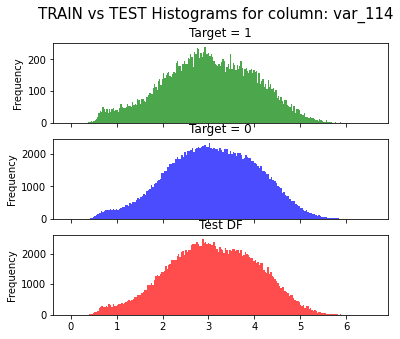

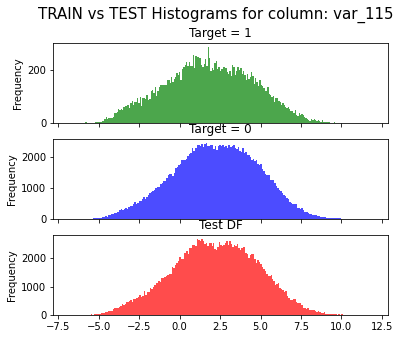

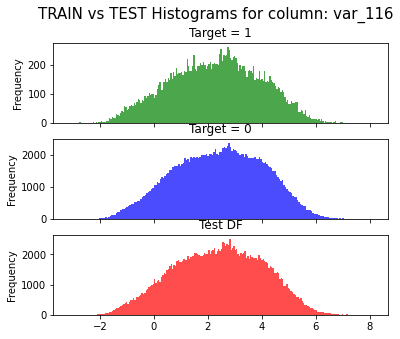

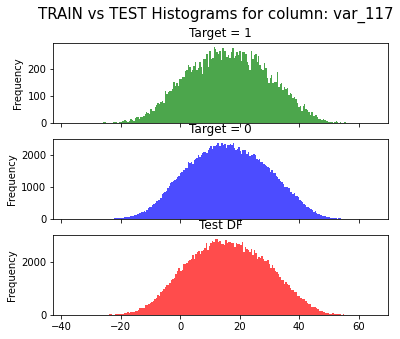

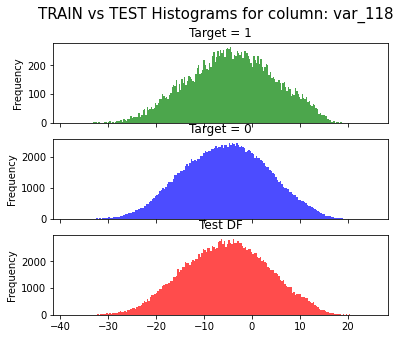

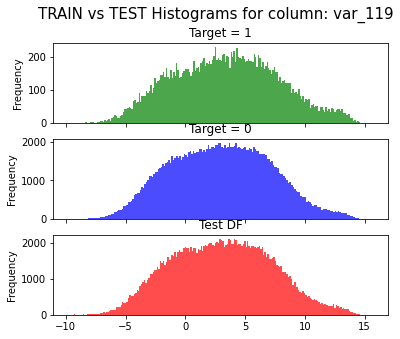

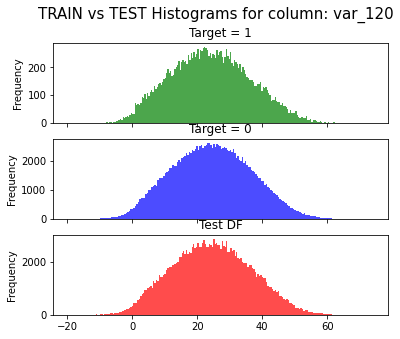

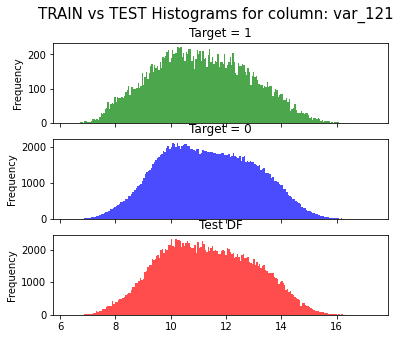

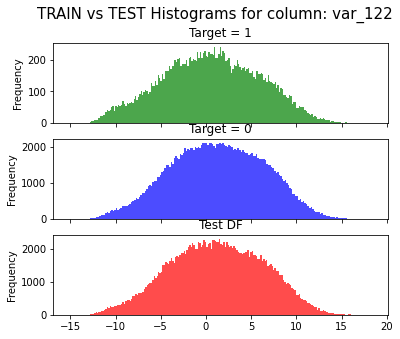

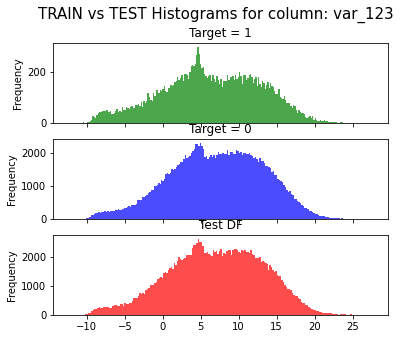

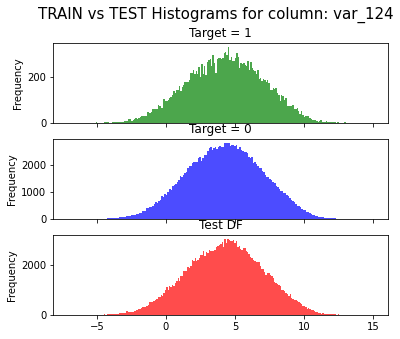

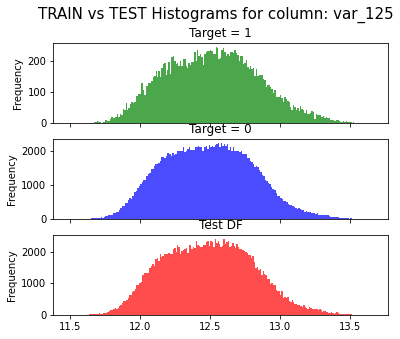

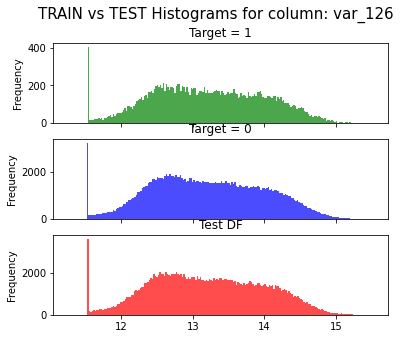

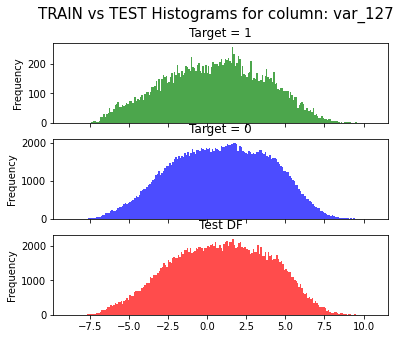

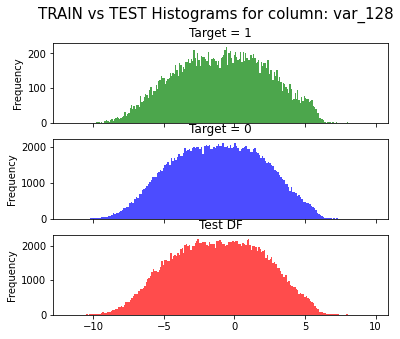

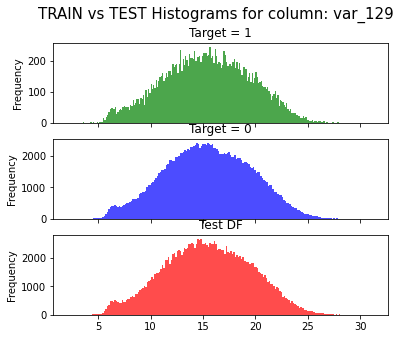

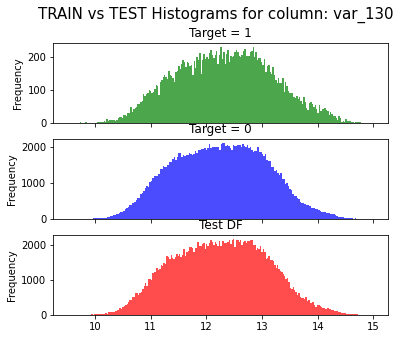

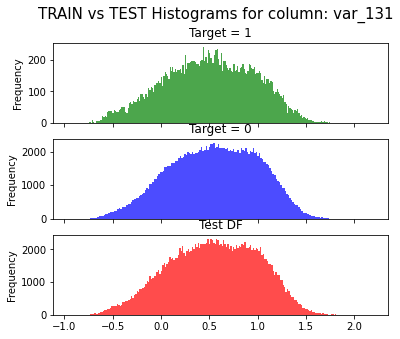

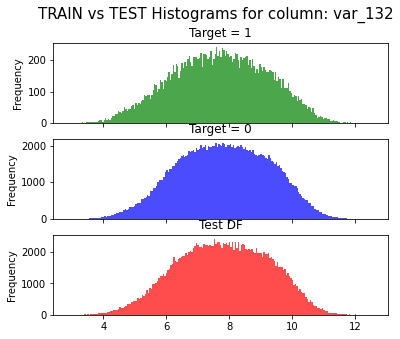

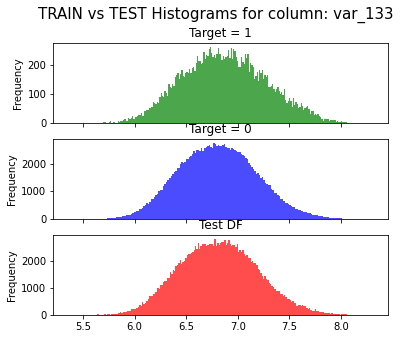

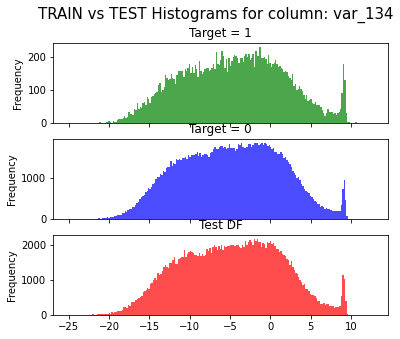

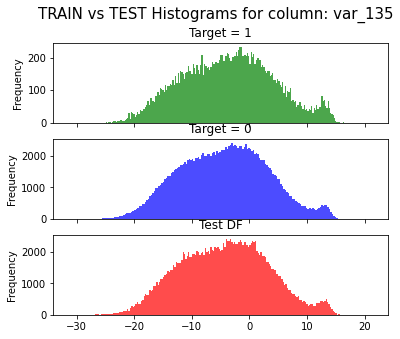

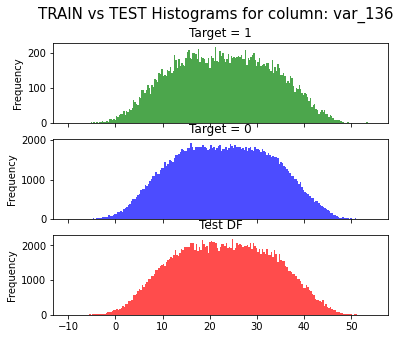

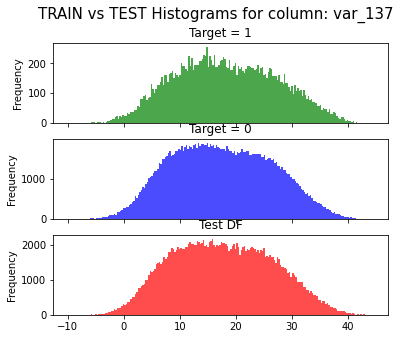

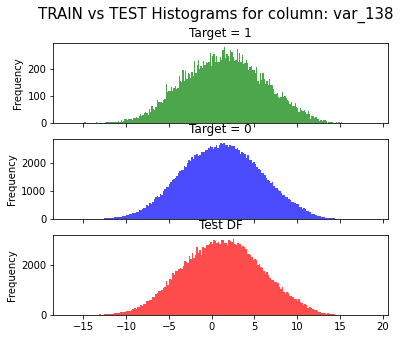

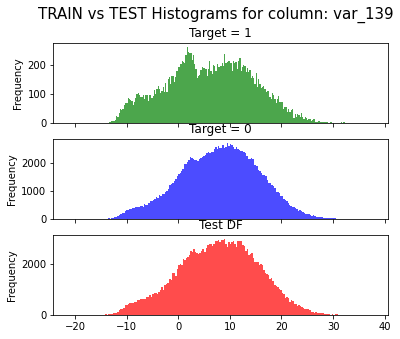

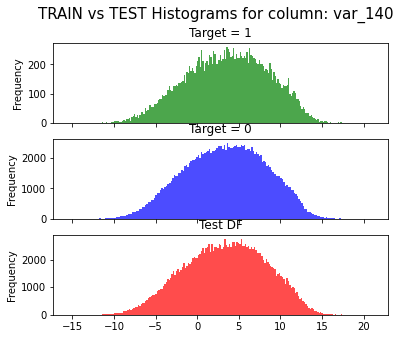

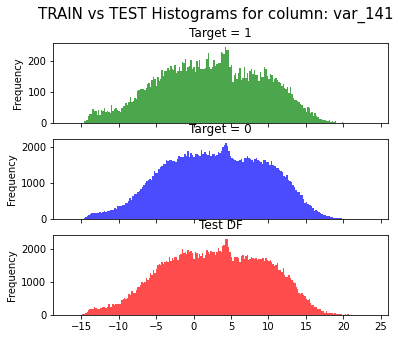

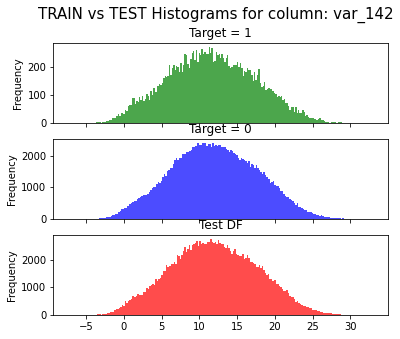

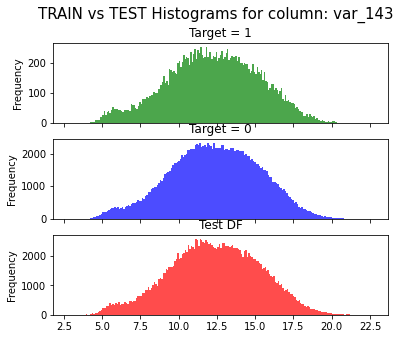

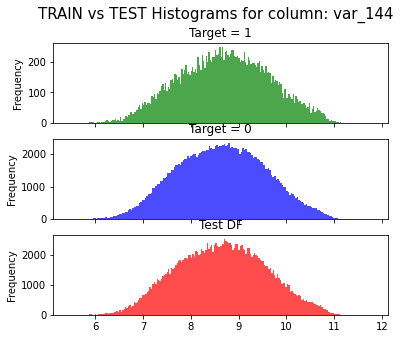

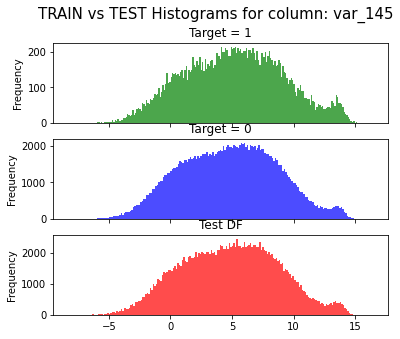

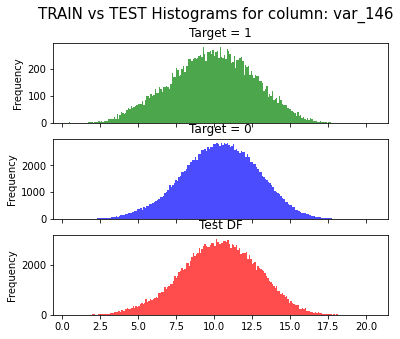

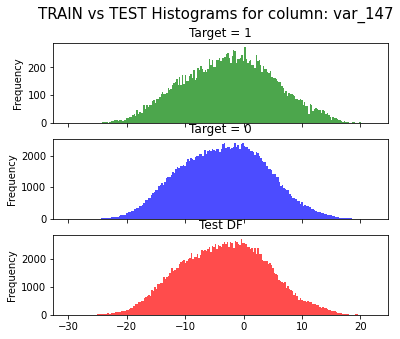

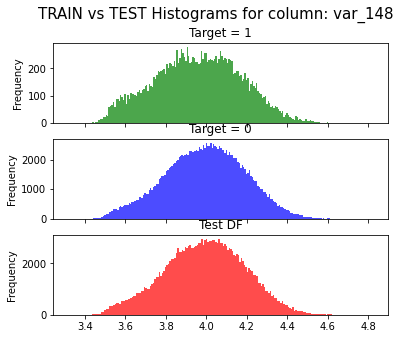

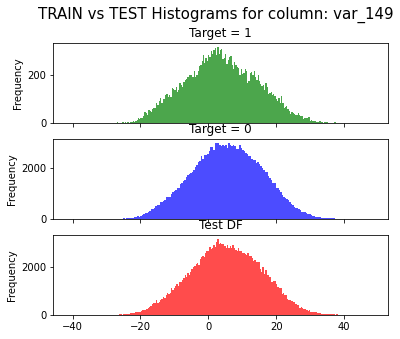

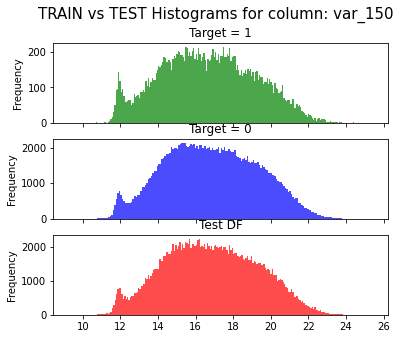

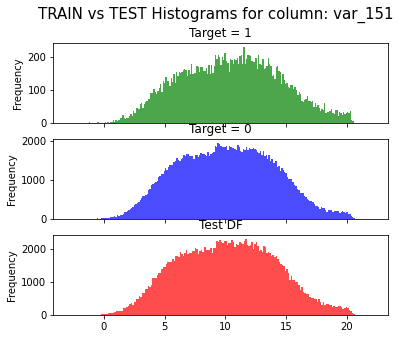

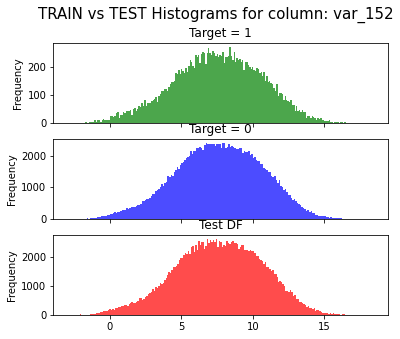

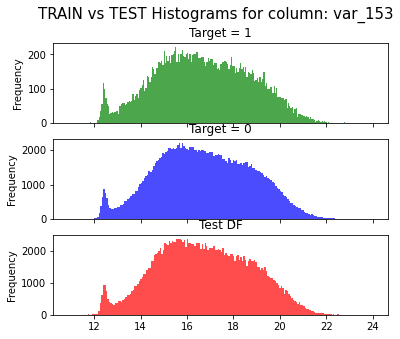

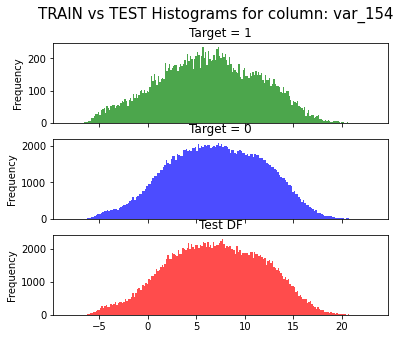

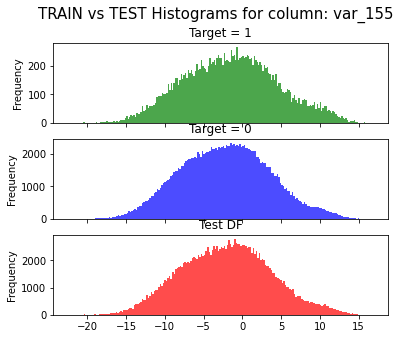

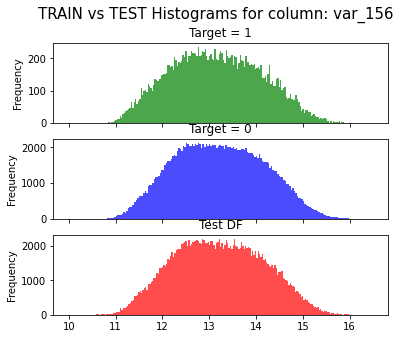

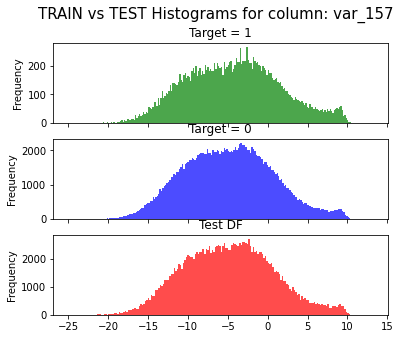

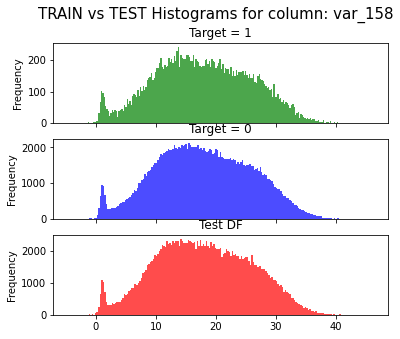

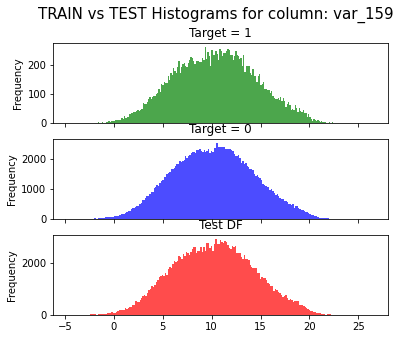

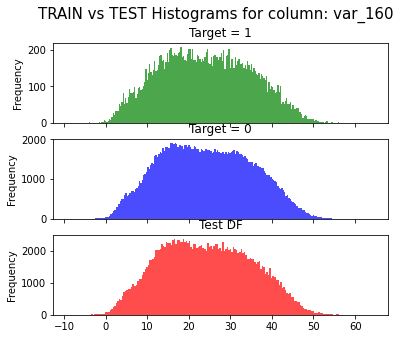

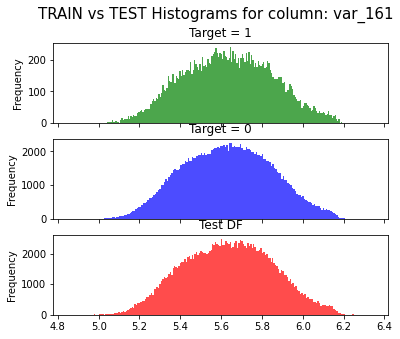

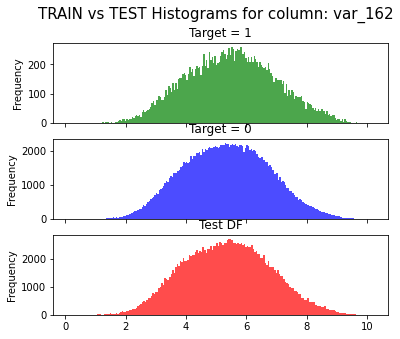

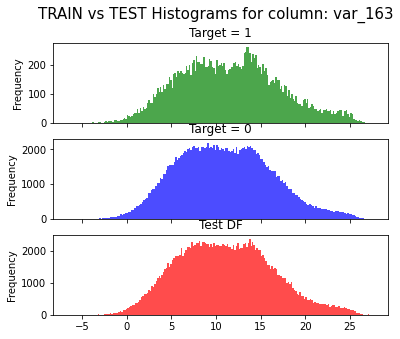

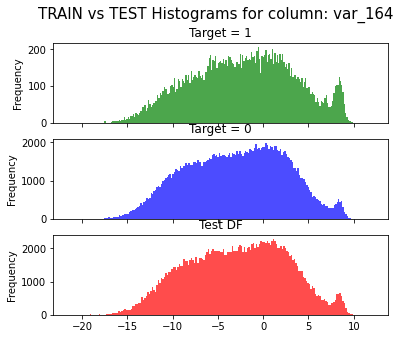

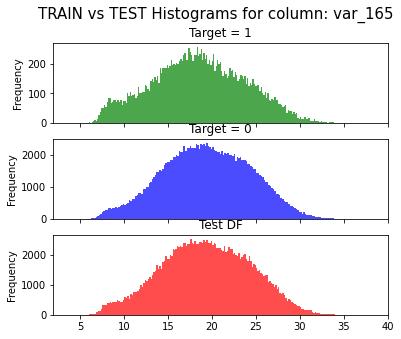

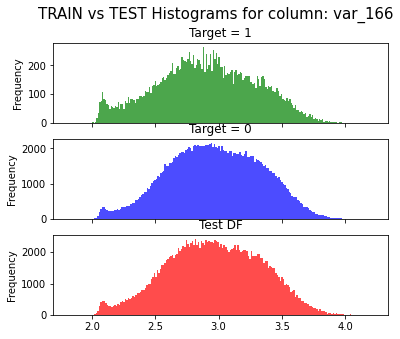

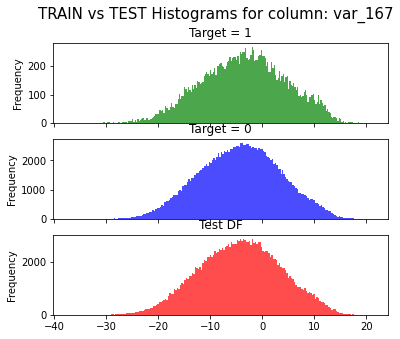

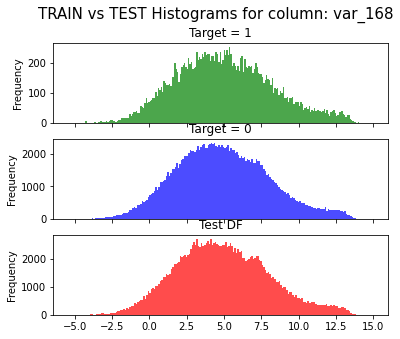

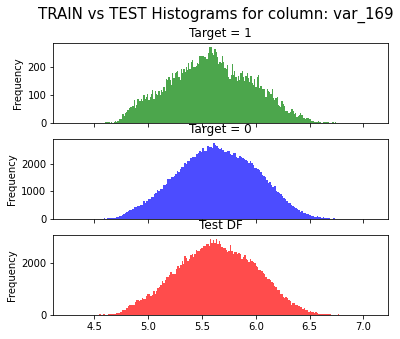

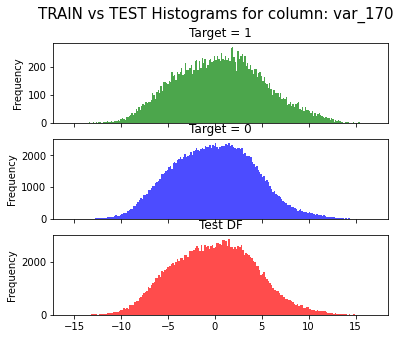

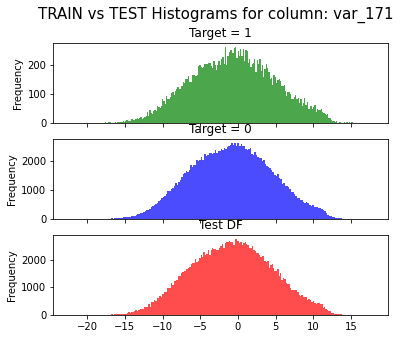

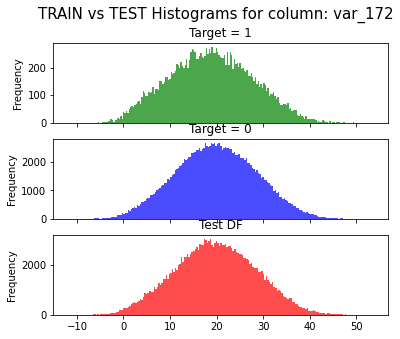

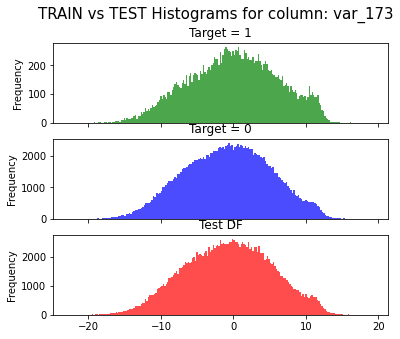

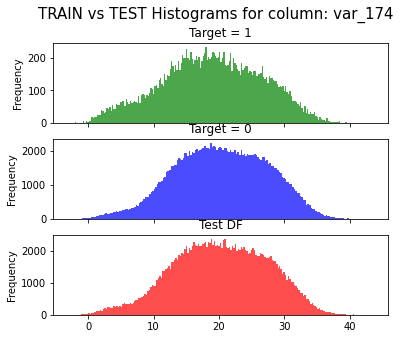

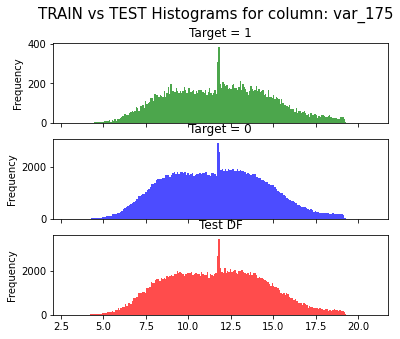

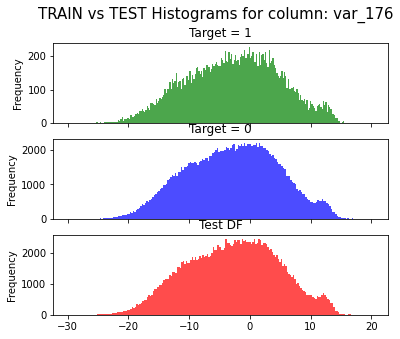

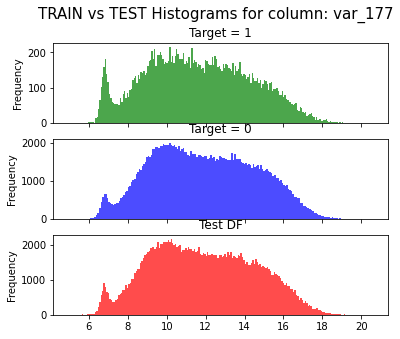

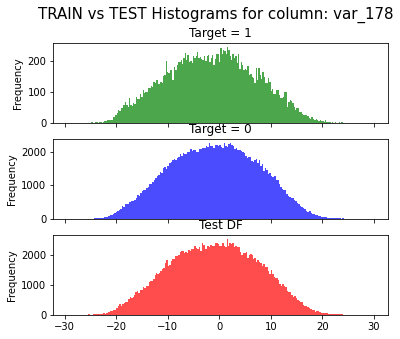

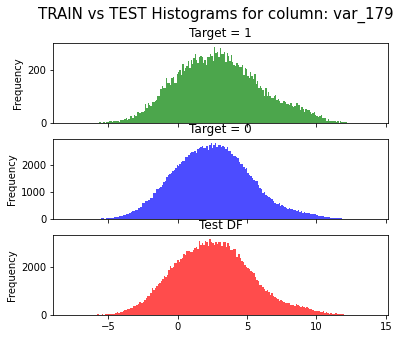

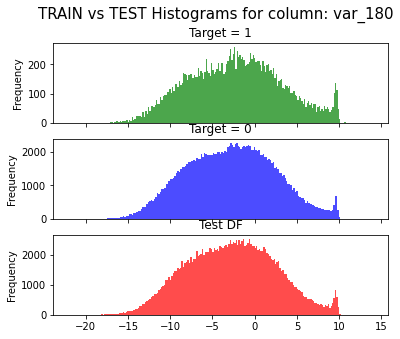

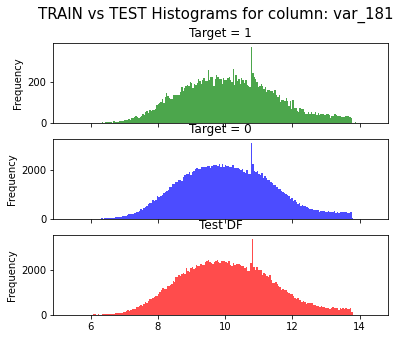

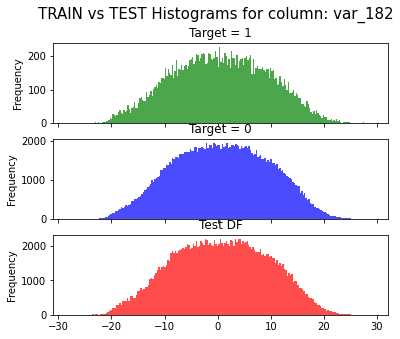

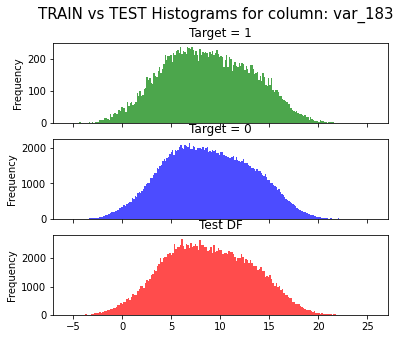

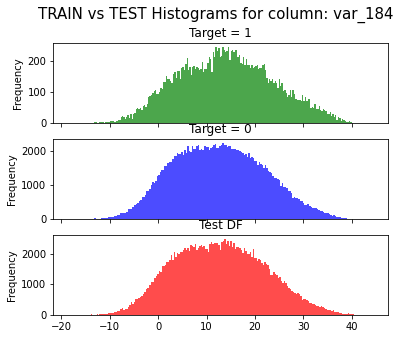

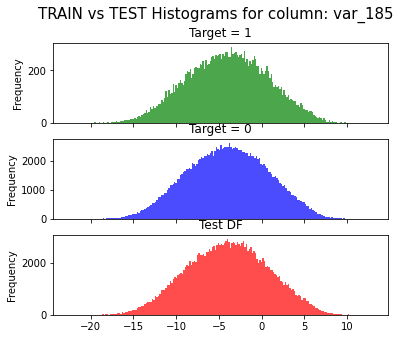

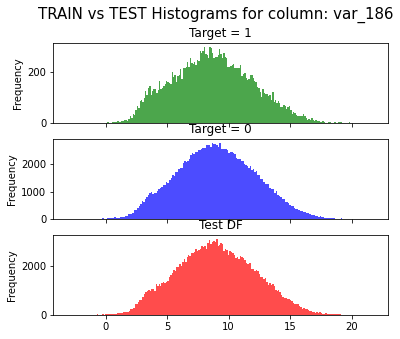

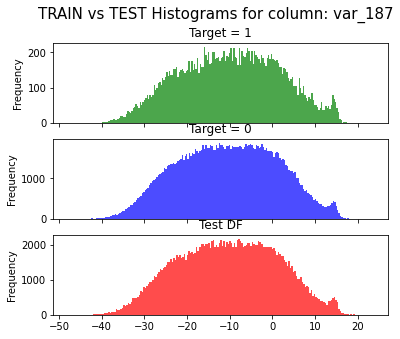

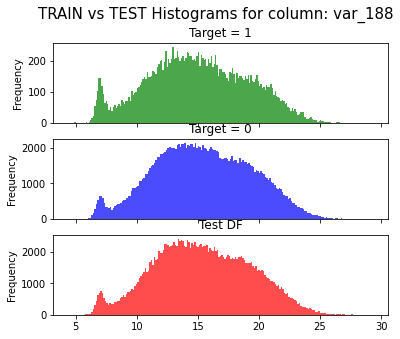

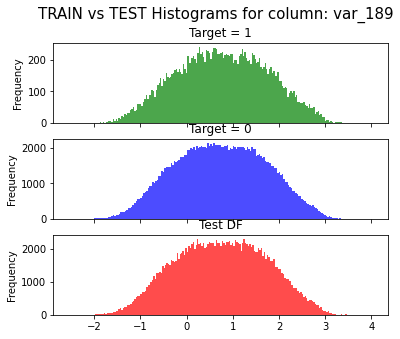

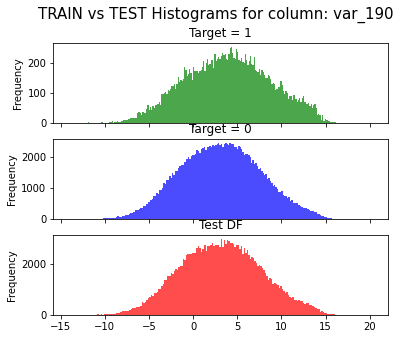

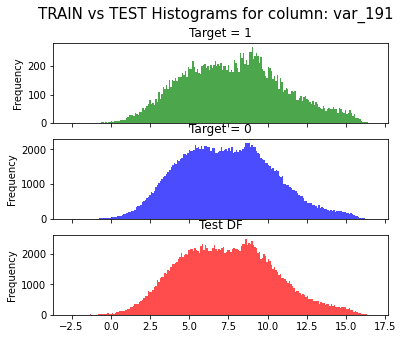

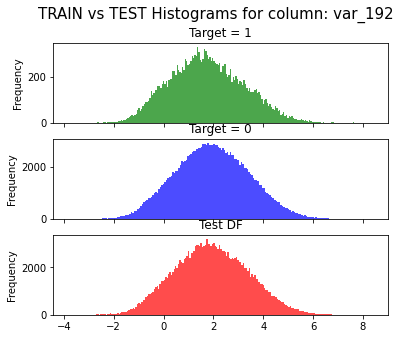

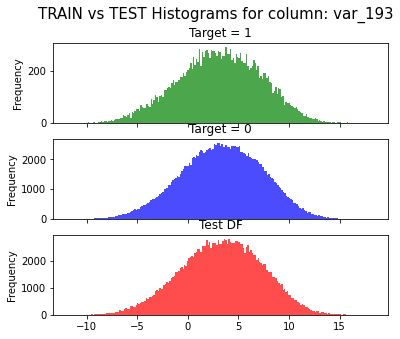

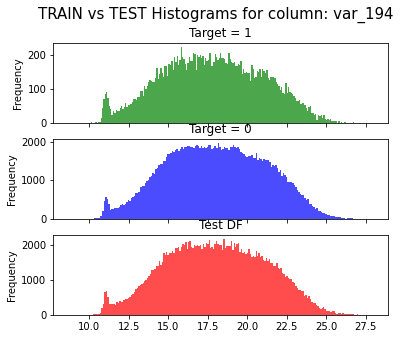

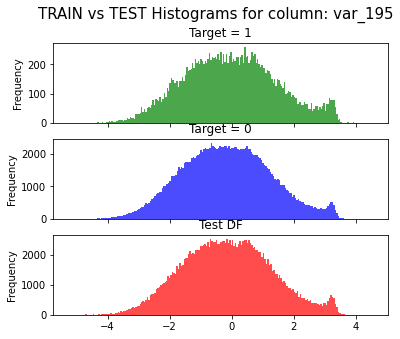

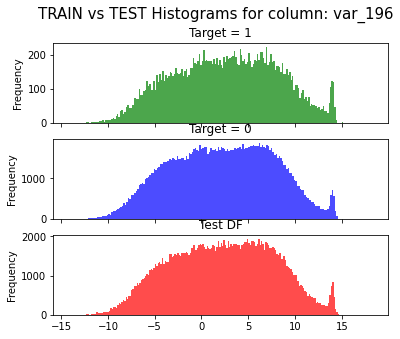

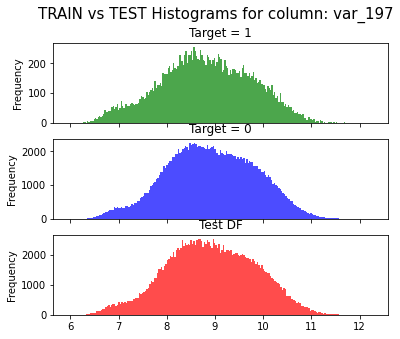

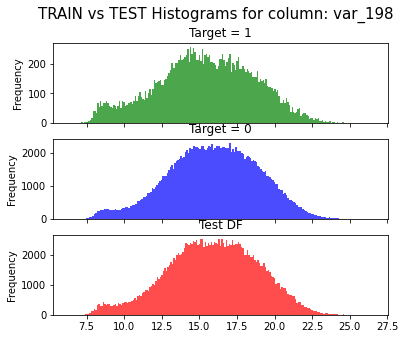

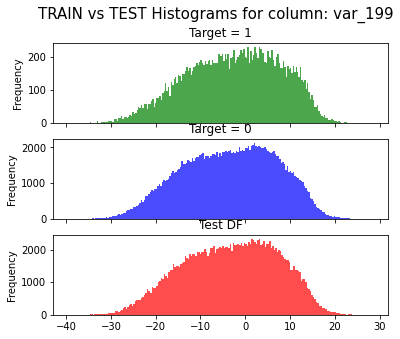

In [ ]:
#Reference (Raimondi, o. D.)
#Plot the histogram comparison for all feature columns
for i in range(0,200):
    #displaying histograms for the selected column:
    fig2, axes2 = plt.subplots(nrows = 3, sharex = True, figsize=(6,5))

    # boxplot only for records with target = 1
    ax1 = train.loc[train["target"] == 1][variables[i]].plot.hist(ax=axes2[0], bins=200, color='green', alpha=0.7)
    ax1.set_title('Target = 1')

    # boxplot only for records with target = 0
    ax2 = train.loc[train["target"] == 0][variables[i]].plot.hist(ax=axes2[1], bins=200, color='blue', alpha=0.7)
    ax2.set_title('Target = 0')

    #TEST DF
    ax3 = test.loc[:][variables[i]].plot.hist(ax=axes2[2], bins=200, color='red', alpha=0.7)
    ax3.set_title('Test DF')

    fig2.suptitle("TRAIN vs TEST Histograms for column: " + str(variables[i]), fontsize=15)
    plt.show()

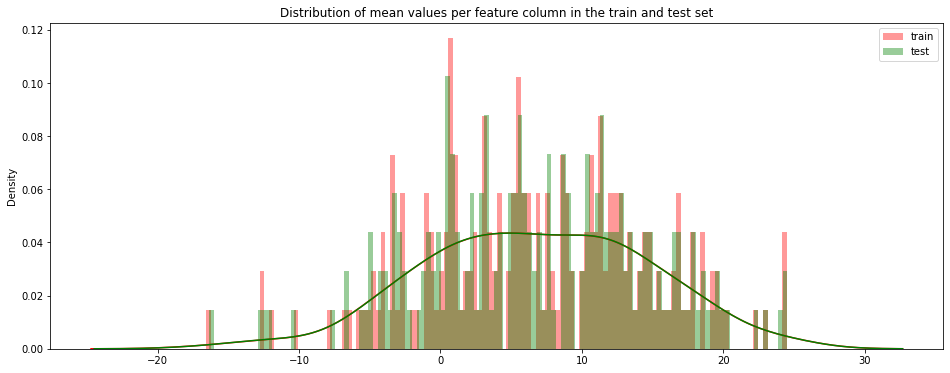

In [ ]:
#Reference (Preda, 2019)
#plot the distribution of the mean values of all features from train and test set
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per feature column in the train and test set")
sns.distplot(train[features].mean(axis=0),color="red",kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()

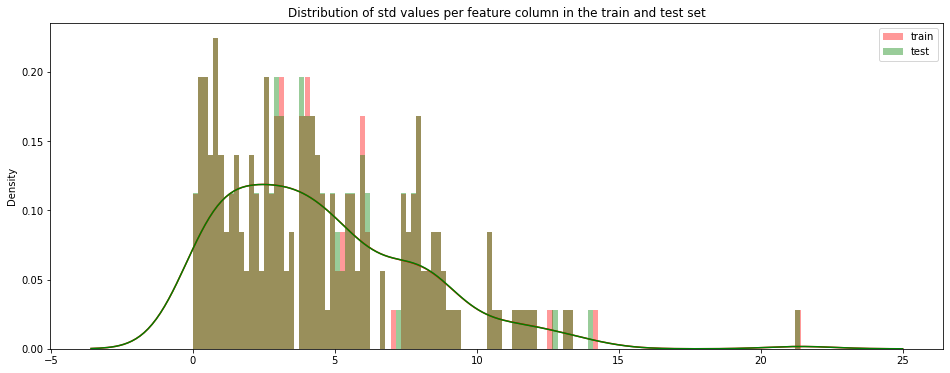

In [ ]:
#Reference (Preda, 2019)
#plot the distribution of the std values values of all features from train and test set
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per feature column in the train and test set")
sns.distplot(train[features].std(axis=0),color="red",kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

**Answer 1.10:** The distributions look quite similar even though there are some minor differences in some cases. we can observe from this that probably not some single variables are crucial for being able to differentiate between buyers & sellers but the combination of a lot of features makes it possible.

The distribution of the standard deviation from the train and test set look very similar aswell.

### 1.11 Feature Correlation

Next we want to analyse the feature correlation.

**Question 1.11:** Are there features that are correlated with each other? If Yes, Which ones?

In [ ]:
# Calculate the correlation matrix of the train set features without target
corr_data = train.drop("target", axis=1)
corr = corr_data.corr()
corr

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
var_0    1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046  0.006983   
var_1   -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902  0.003258   
var_2    0.006573  0.003980  1.000000  0.001001  0.000723  0.001569  0.000883   
var_3    0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253 -0.000774   
var_4    0.001326  0.000303  0.000723 -0.000322  1.000000 -0.001368  0.000049   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.002073 -0.000785 -0.001070  0.001206  0.003706 -0.001274  0.001244   
var_196  0.004386 -0.000377  0.003952 -0.002800  0.000513  0.002880  0.005378   
var_197 -0.000753 -0.004157  0.001078  0.001164 -0.000046 -0.000535 -0.003565   
var_198 -0.005776 -0.004861 -0.000877 -0.001651 -0.001821 -0.000953 -0.003025   
var_199  0.003850  0.002287  0.003855  0.000506 -0.000786  0.002767  0.006096   

            var_7     var_8     var_9  ...   var_190   var_191   var_192  \
var_0    0.002429  0.004962 -0.002613  ...  0.002752  0.000206 -0.005373   
var_1    0.001511  0.004098 -0.000832  ...  0.006627  0.003621 -0.002604   
var_2   -0.000991  0.002648 -0.001932  ...  0.000197  0.001285 -0.003400   
var_3    0.002500  0.003553 -0.000826  ...  0.000151  0.002445 -0.001530   
var_4    0.004549  0.001194 -0.000918  ...  0.001514  0.004357  0.003347   
...           ...       ...       ...  ...       ...       ...       ...   
var_195  0.001854  0.001396 -0.000868  ...  0.004571  0.000870 -0.004745   
var_196  0.001045 -0.003242  0.000052  ... -0.000847  0.002466 -0.001386   
var_197  0.003466 -0.004583  0.003701  ... -0.004974  0.000906 -0.000527   
var_198  0.000650  0.002950  0.002343  ... -0.000153 -0.000067  0.003451   
var_199 -0.001457  0.000854  0.001070  ... -0.000404  0.003595 -0.001239   

          var_193   var_194   var_195   var_196   var_197   var_198   var_199  
var_0    0.001616 -0.001514  0.002073  0.004386 -0.000753 -0.005776  0.003850  
var_1    0.001153 -0.002557 -0.000785 -0.000377 -0.004157 -0.004861  0.002287  
var_2    0.000549  0.002104 -0.001070  0.003952  0.001078 -0.000877  0.003855  
var_3   -0.001699 -0.001054  0.001206 -0.002800  0.001164 -0.001651  0.000506  
var_4    0.000813 -0.000068  0.003706  0.000513 -0.000046 -0.001821 -0.000786  
...           ...       ...       ...       ...       ...       ...       ...  
var_195 -0.003143 -0.001201  1.000000  0.002517 -0.004170 -0.000536  0.002042  
var_196 -0.005308 -0.005040  0.002517  1.000000 -0.000454  0.000253  0.000607  
var_197  0.005068  0.000884 -0.004170 -0.000454  1.000000  0.001183  0.004991  
var_198  0.001646  0.003194 -0.000536  0.000253  0.001183  1.000000 -0.004731  
var_199 -0.000552 -0.005615  0.002042  0.000607  0.004991 -0.004731  1.000000  

[200 rows x 200 columns]

In [ ]:
# Set the threshold for counting correlations
threshold = 0.01

# Count the number of correlations above the threshold (exlude diagonal correleation 1)
count = np.count_nonzero(corr > threshold) -200

# Print the result
print("Number of correlations above {}: {}".format(threshold, count))

Number of correlations above 0.01: 0


In [ ]:
# Find the maximum value in the correlation matrix
max_value = corr[corr == 1] = 0
max_value = corr.max().max()

# Print the result
print("Maximum value in the correlation matrix (without target):", max_value)

Maximum value in the correlation matrix (without target): 0.009713658349533924


In [ ]:
#References (Kuriminisetty, 2021)
#Create tables that show the feature correlation in the train set
df_train_corr = train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

#References (Kuriminisetty, 2021)
#Create tables that show the feature correlation in the test set
df_test_corr = test.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [ ]:
#References (Kuriminisetty, 2021)
# Top 5 Highest Correlations in the Training Set inc. target
df_train_corr_nd.tail()

Feature 1 Feature 2  Correlation Coefficient
40190   var_110    target                 0.064275
40192     var_6    target                 0.066731
40194    var_12    target                 0.069489
40196    target   var_139                 0.074080
40198    target    var_81                 0.080917

In [ ]:
#References (Kuriminisetty, 2021)
# Top 5 Highest Correlations between variables in the Training Set without target
df_train_corr_nd[np.logical_and(df_train_corr_nd['Feature 1'] != 'target', df_train_corr_nd['Feature 2'] != 'target')].tail()

Feature 1 Feature 2  Correlation Coefficient
39868   var_183   var_189                 0.009359
39870    var_81   var_174                 0.009490
39872   var_165    var_81                 0.009714
39874    var_53   var_148                 0.009788
39876   var_139    var_26                 0.009844

In [ ]:
#References (Kuriminisetty, 2021)
# Top 5 Highest Correlations in the Test Set
df_test_corr_nd.tail()

Feature 1 Feature 2  Correlation Coefficient
39790   var_122   var_164                 0.008513
39792   var_164     var_2                 0.008614
39794    var_31   var_132                 0.008714
39796    var_96   var_143                 0.008829
39798   var_139    var_75                 0.009868

**Answer 1.11:** Features from var_0 to var_199 have extremely low correlation between each other in both training set and test set. All the correlations between the independent features are < 0.01 There are no independent features which are higher correlated with each other than 0.01 which is a very low correlation. We can conlcude that th features are not significantly correlated with eatch other. They are all extremely uncorrelated.

Maybe the data was already preprocessed before!

### 1.12 Density Graphs

Next we will explore the data set with some density graphs of the different feature variables.

A density plot is a graphical representation of the distribution of a continuous numeric variable. It uses a kernel density estimate to show the probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.

The denisty graphs shows the likelihood that a given value will appear in the data set. Density plots are commonly used in data science and machine learning to visualize the distribution of data and to see if there are any patterns or trends in the data.

First let's plot the density graph of one single feature vairable "var_0".

**Question 1.12:** How does the distribution of the values in the individual feature variables differ from buyers (target =1) and non-buyers (target = 0)? How do the differ n the train and test set? Are there any significant differences we can exploit for our model?

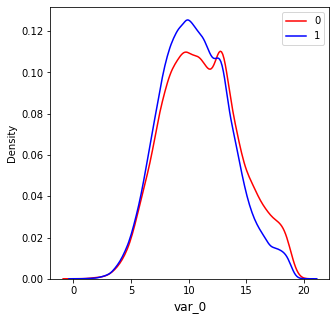

In [ ]:
#Reference (Raimondi, o. D.)
#plot density graph of one single feature variable for target = 1 and target = 0 in the train set
fig = plt.figure(figsize=(5,5))
sns.distplot(train[train['target']==1]['var_0'], hist=False,label='0', color='red')
sns.distplot(train[train['target']==0]['var_0'], hist=False,label='1', color='blue')
plt.xlabel('var_0', fontsize=12)
locs, labels = plt.xticks()
plt.legend()
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)

In [ ]:
#Reference (Raimondi, o. D.)
#create function to plot the value distribution of the different feature variables
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1, color='red')
        sns.distplot(df2[feature], hist=False,label=label2, color='blue')
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

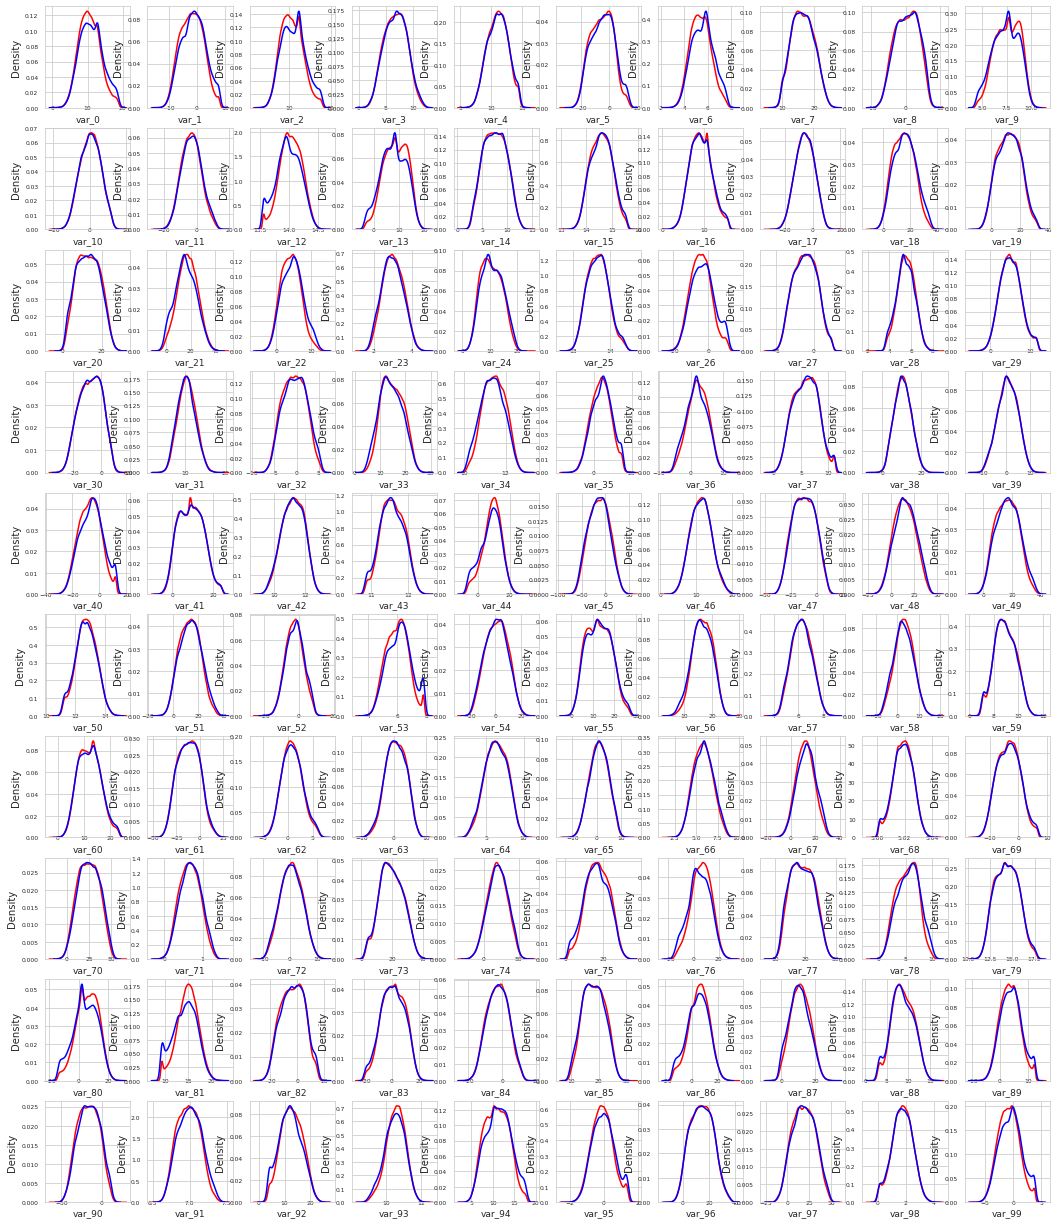

In [ ]:
#Reference (Raimondi, o. D.)
#create two data sets one for target = 1 (buyers) and one for target = 0 (non buyers)
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]

#Reference (Raimondi, o. D.)
#plot the density graphs for feature variable 0 - 99 of the train set
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

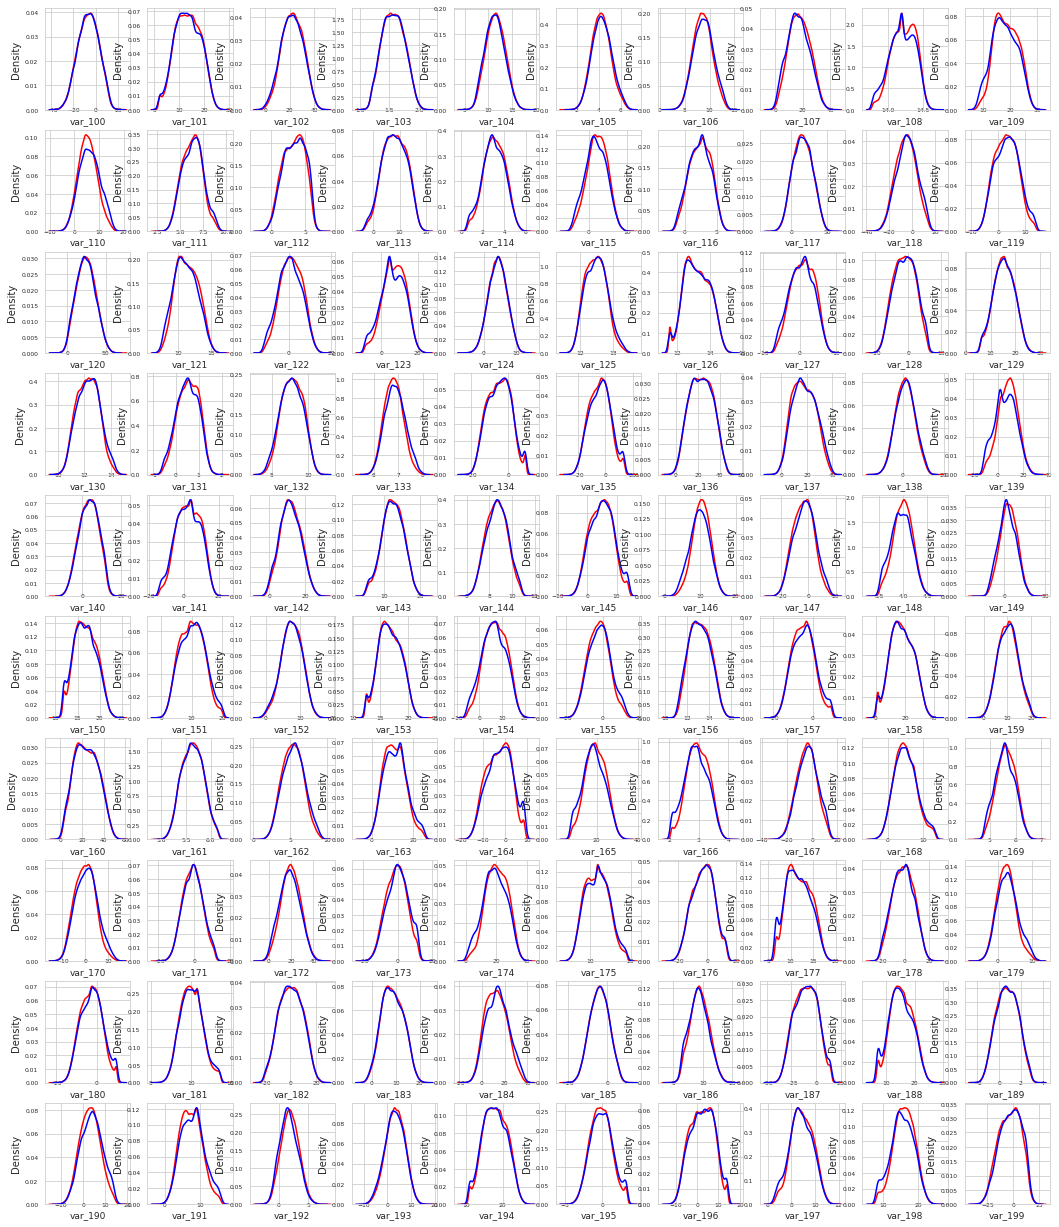

In [ ]:
#Reference (Raimondi, o. D.)
#plot the density graphs for feature variable 100 - 199 of the train set
features = train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

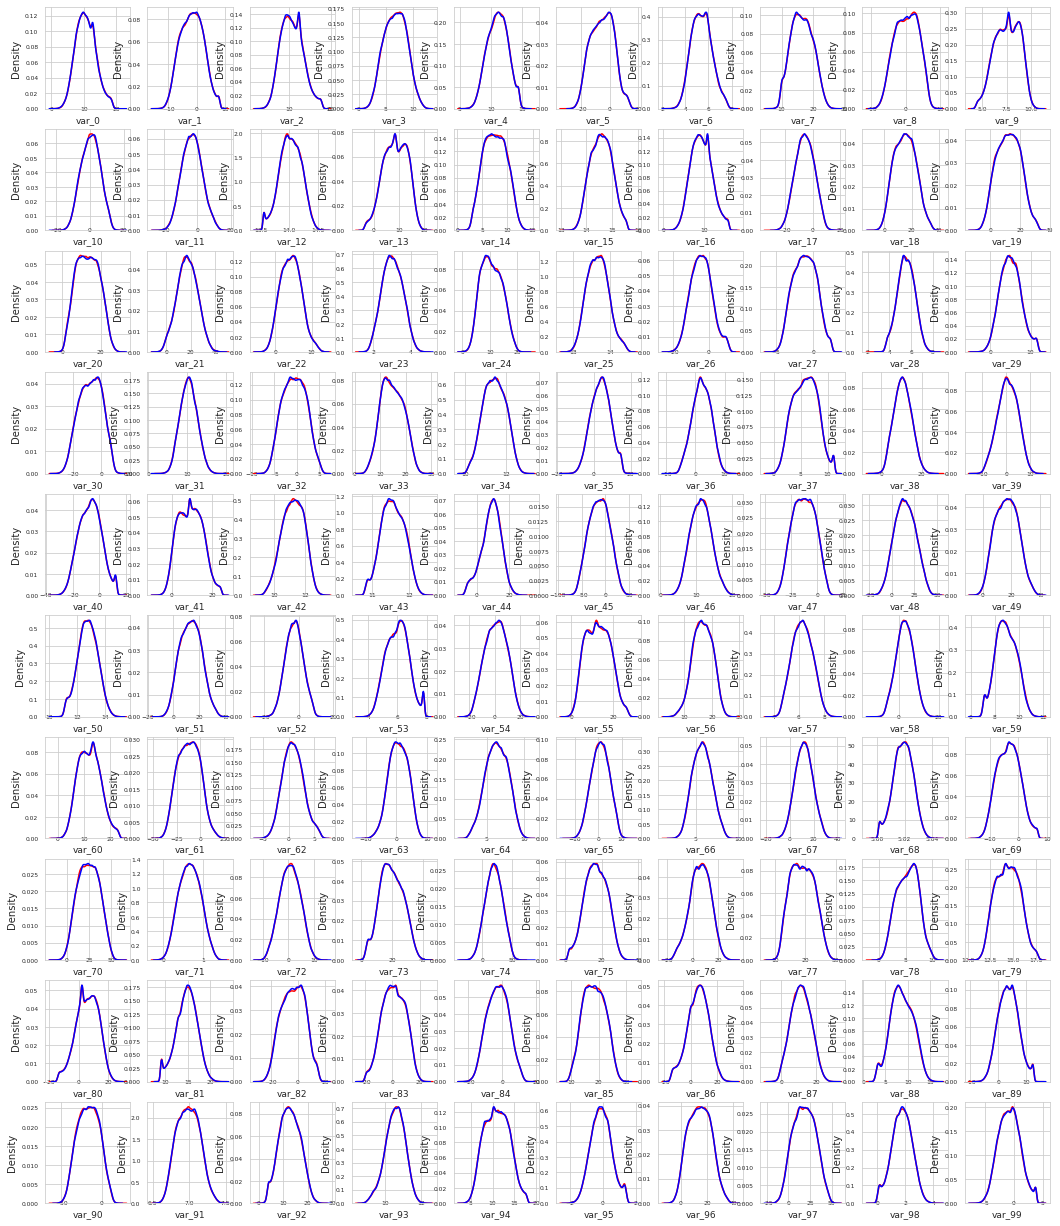

In [ ]:
#Reference (Raimondi, o. D.)
features = train.columns.values[2:102]
plot_feature_distribution(train, test, 'train', 'test', features)

<Figure size 432x288 with 0 Axes>

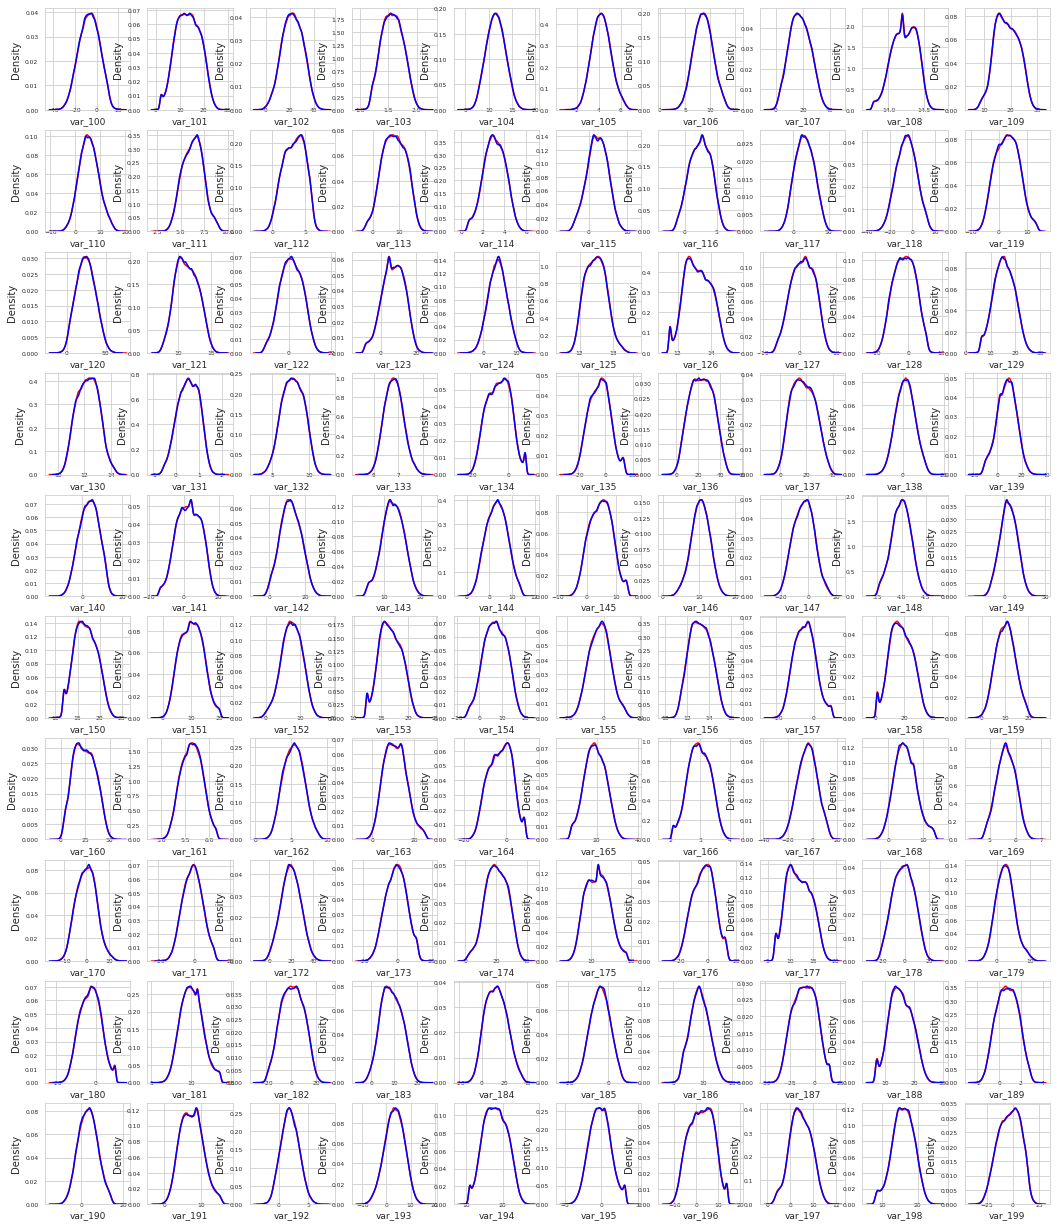

In [ ]:
features = train.columns.values[102:202]
plot_feature_distribution(train, test, 'train', 'test', features)

**Answer 1.12:** As we can see between the train and test set there are nearly zero differences in the value distribution of the feature variables.

But there are quite some differences in the value distribution of the feature variables of the buyers (target =1) and non-buyers (target = 0). There we can find some differences. As we can see this differences do not occure in all of the variables, but in some of them. This we can probably exploit for our model in the feature engineering.

### 1.13 Probability Function

The target density and the probability function are two different ways of representing probability. The target density is a function that describes the likelihood of different outcomes for a given random variable. The probability function, on the other hand, describes the probability of a specific outcome for a given random variable.

The relationship between the target density and the probability function is that the probability function can be derived from the target density. In other words, the probability function is a special case of the target density, where the function is evaluated at a specific point rather than over a range of values.

In summary, the target density is a more general way of representing probability, while the probability function is a specific way of representing the probability of a single outcome.

Now we will look at the probability functions derived from the previously plotted target density functions for the single outcome of (target = 1).

**Question 1.14:** Where and for which values of each feature variable is the probability for buying (target = 1) the highest/lowiest?

In [ ]:
#Reference (Deotte, 2019)
# Calculate the mean and the standard deviation of the features in the train set
std = [0]*200
mean = [0]*200
for i in range(200):
    std[i] = np.std(train['var_'+str(i)])
    mean[i] = np.mean(train['var_'+str(i)])

In [ ]:
#Reference (Deotte, 2019)
# Calculates the probability (TARGET=1 | X)
# Calculates the probability of a given value appearing in a data set, based on a smoothing factor c and the distribution of the data. 

def probability(i,x):
    c = 3 #smoothing factor
    a = len(train1[ (train1['var_'+str(i)]>x-std[i]/c)&(train1['var_'+str(i)]<x+std[i]/c)]) 
    b = len(train0[ (train0['var_'+str(i)]>x-std[i]/c)&(train0['var_'+str(i)]<x+std[i]/c)])
    if a+b<500: return 0.1 #smoothing factor
    return a / (a+b) #probability

In [ ]:
#Reference (Deotte, 2019)
# Smooths a discrete function by applying a smoothing algorithm to the data.
def smooth(x,st=1):
    for j in range(st):
        x2 = np.ones(len(x)) * 0.1
        for i in range(len(x)-2):
            x2[i+1] = 0.25*x[i]+0.5*x[i+1]+0.25*x[i+2] #weighted average
        x = x2.copy()
    return x

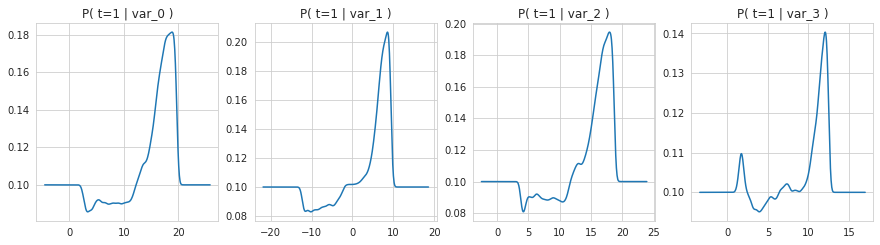

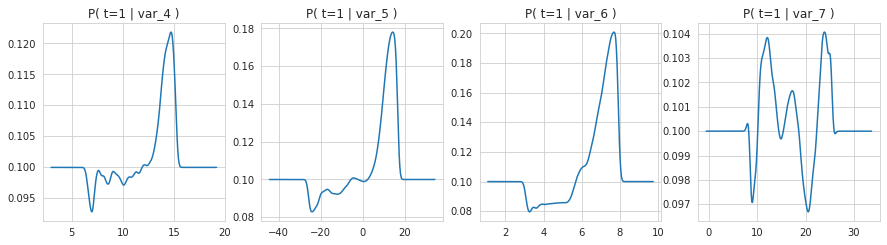

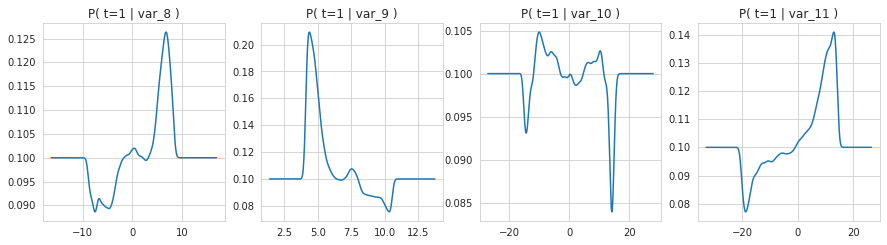

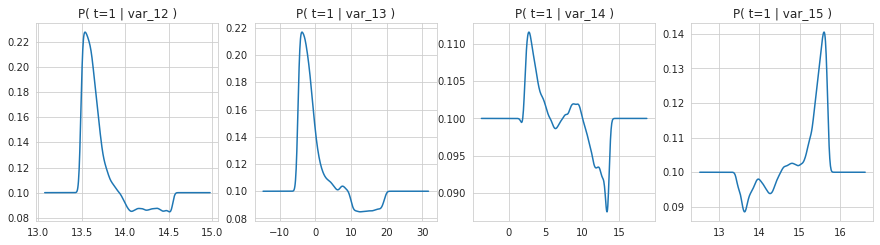

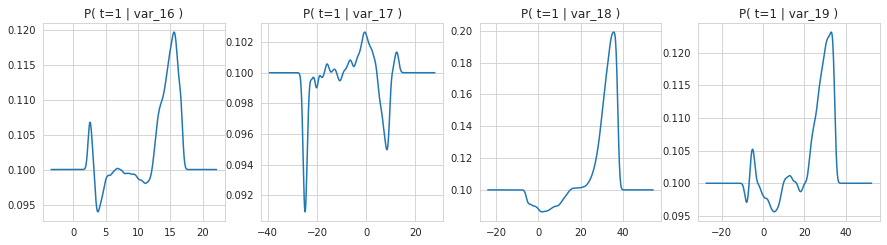

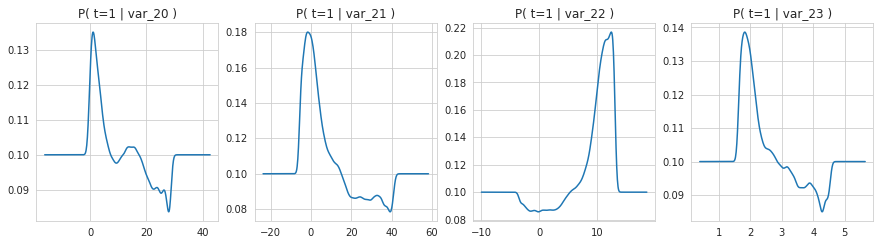

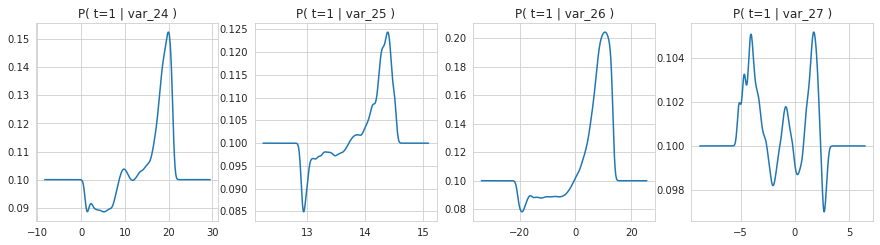

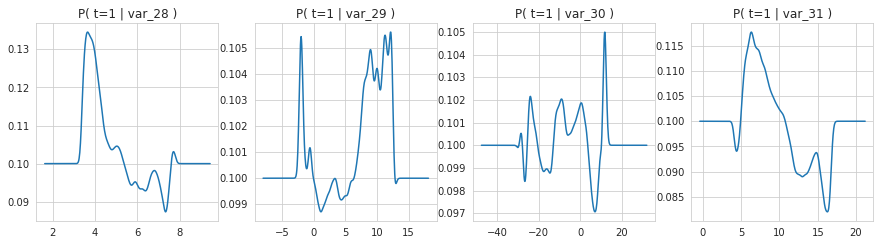

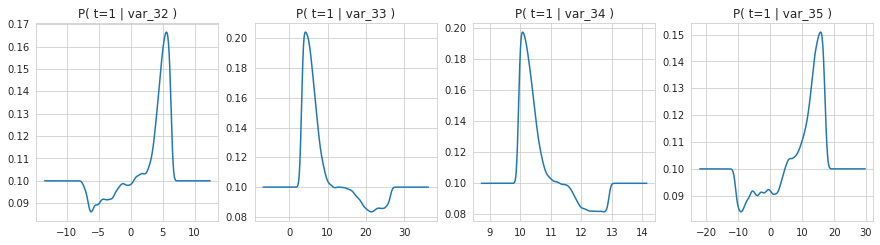

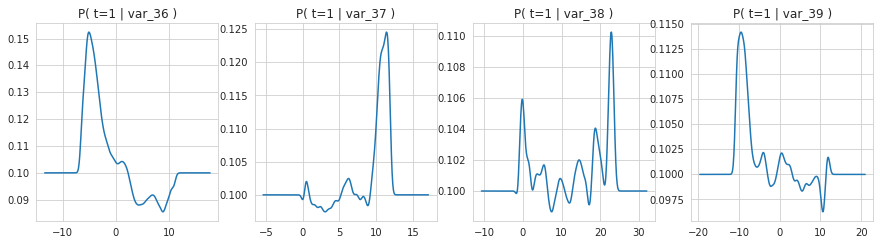

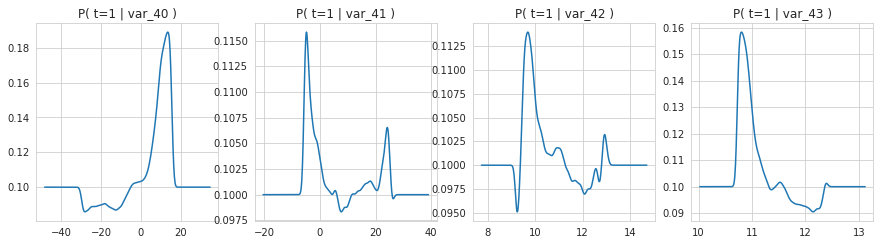

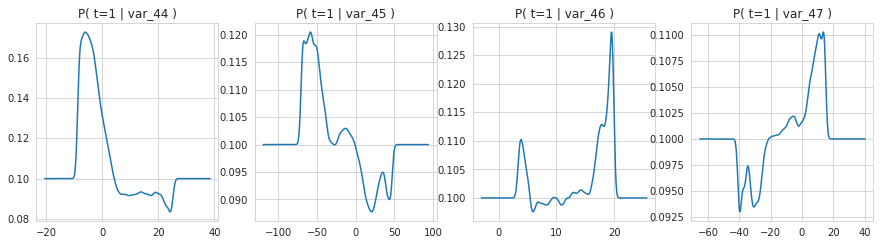

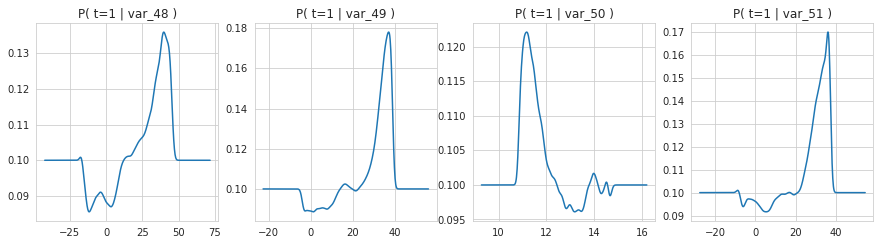

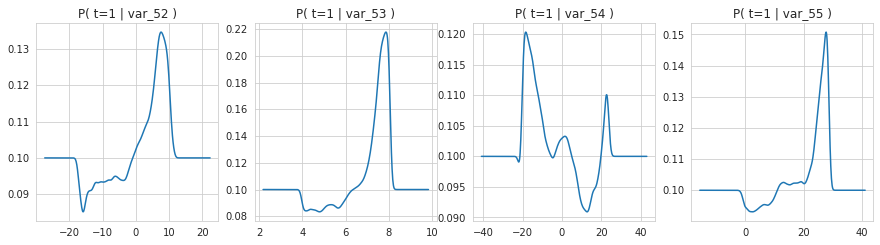

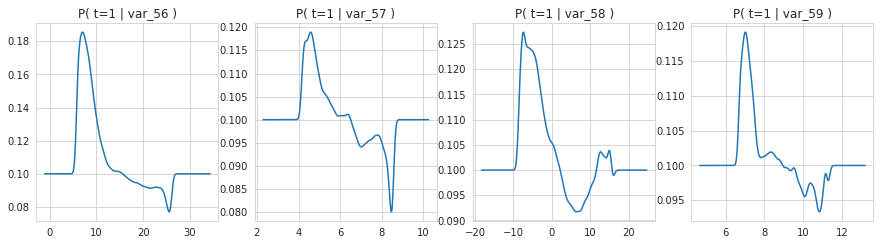

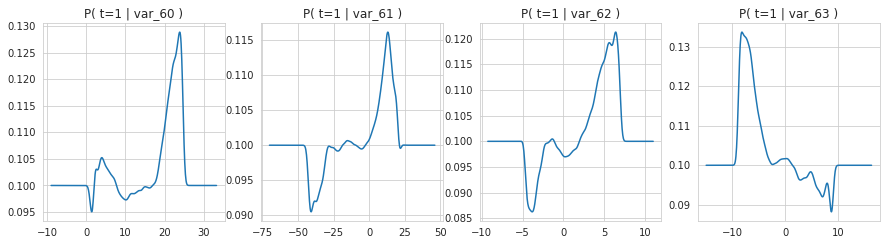

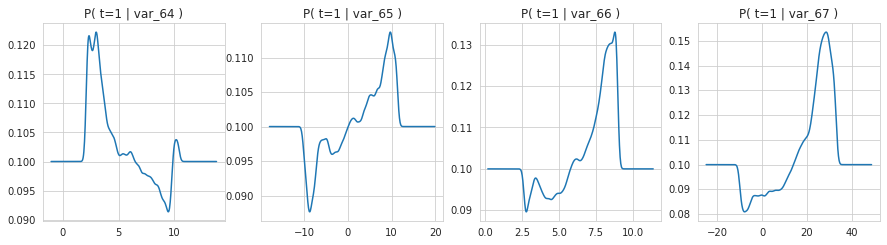

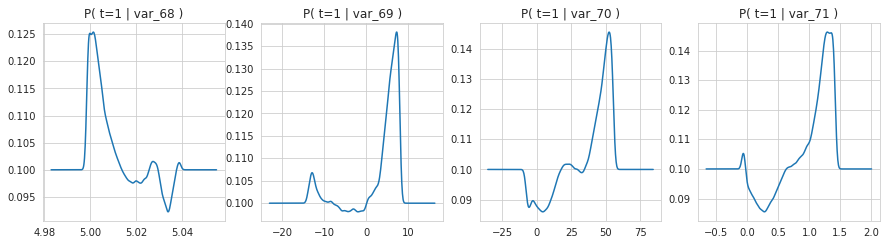

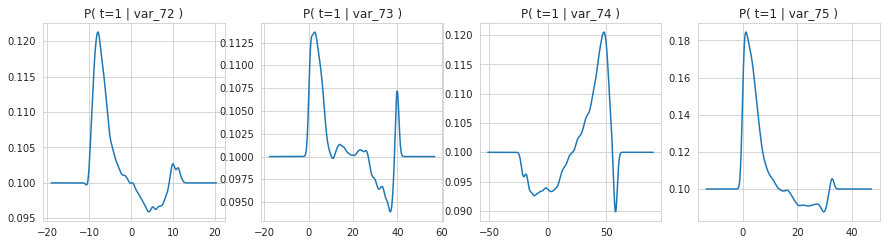

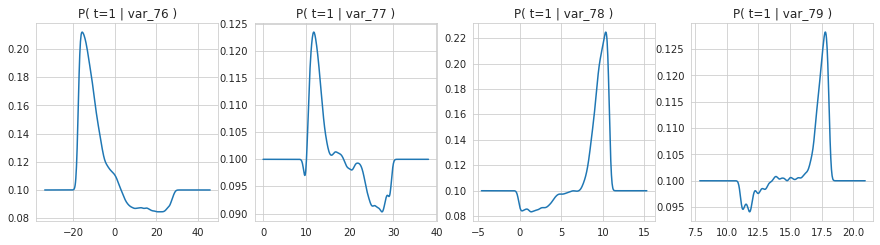

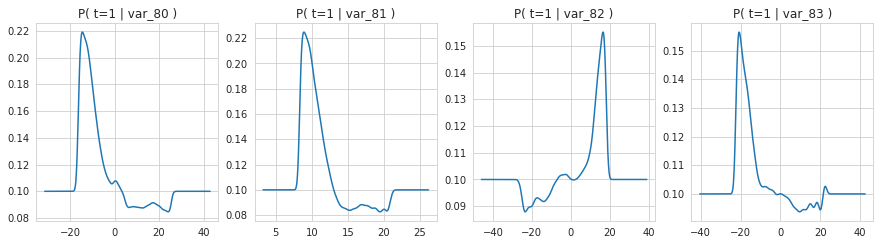

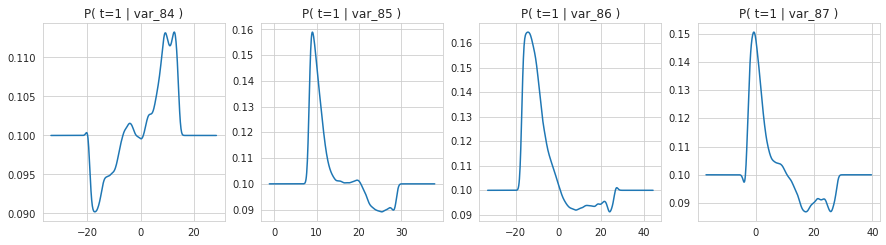

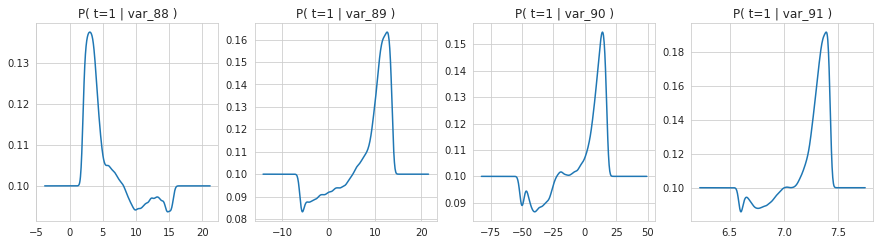

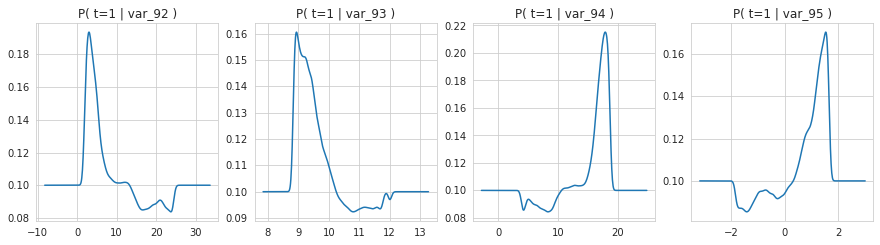

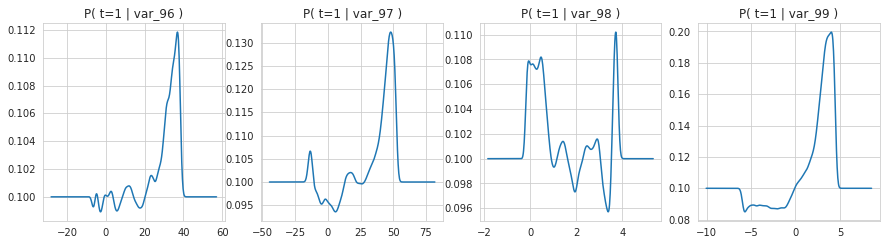

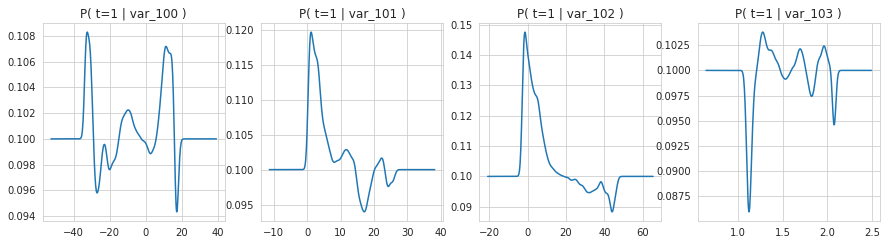

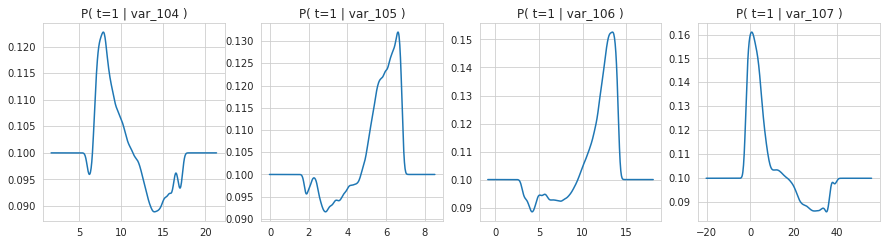

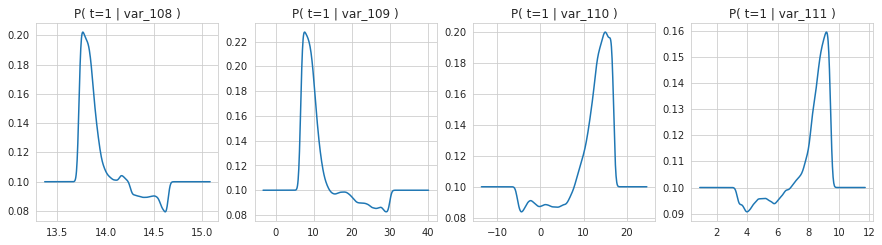

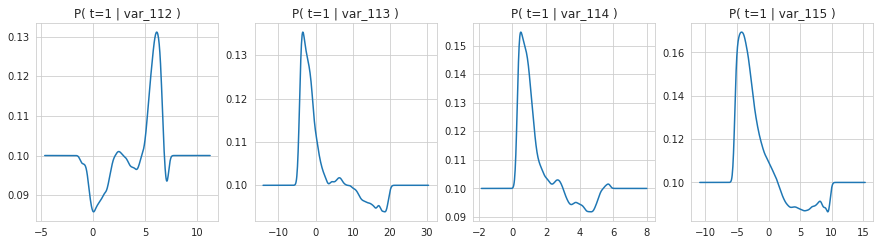

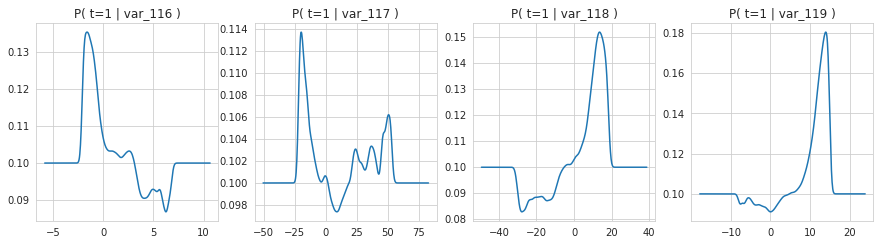

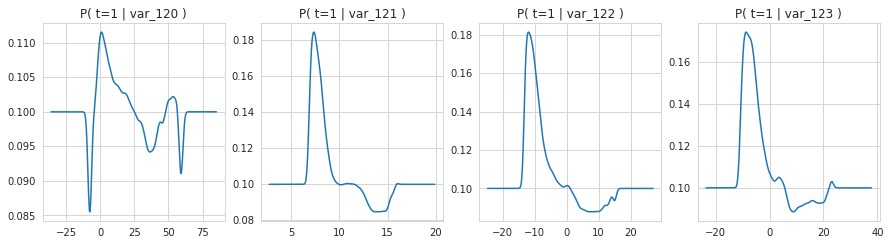

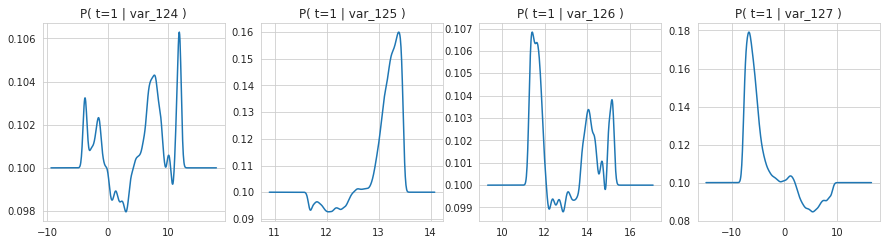

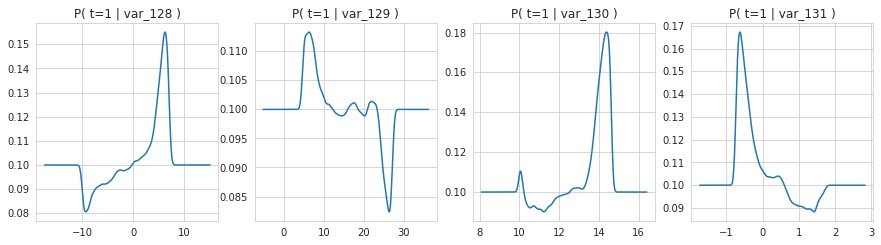

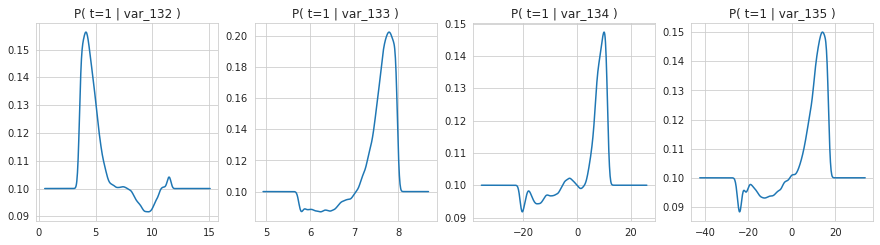

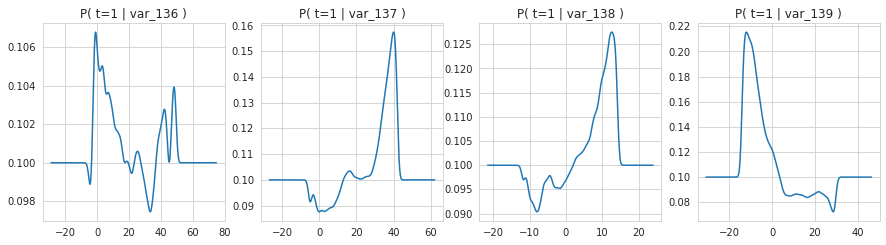

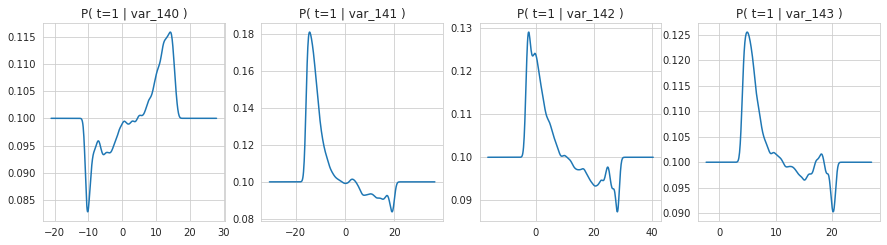

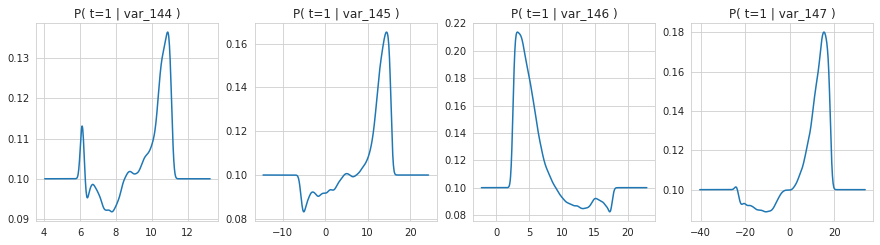

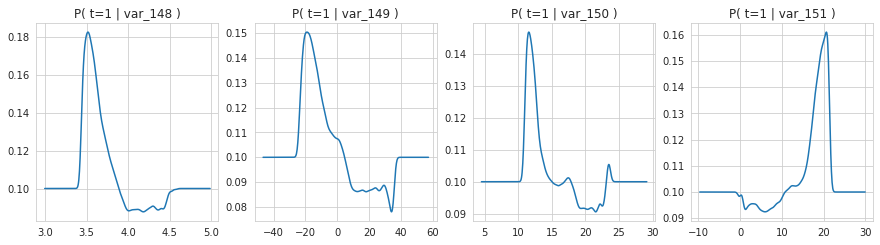

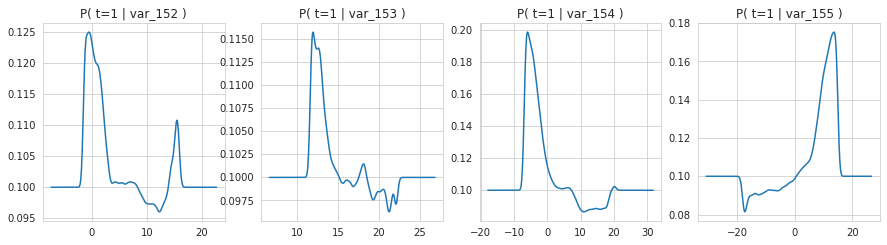

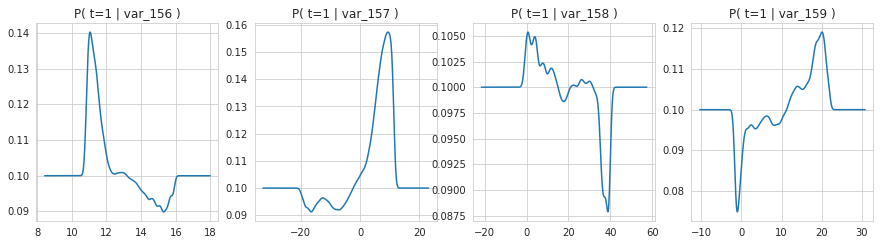

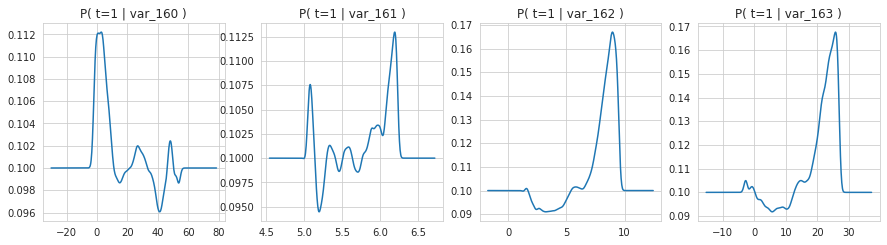

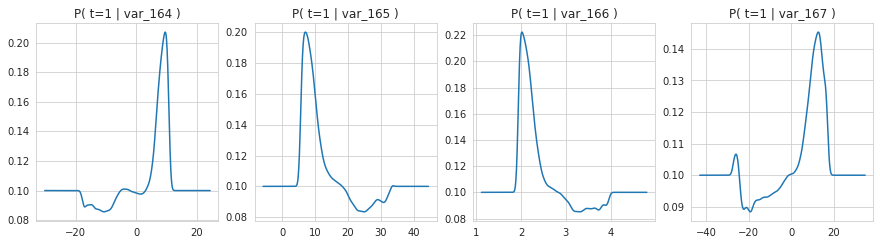

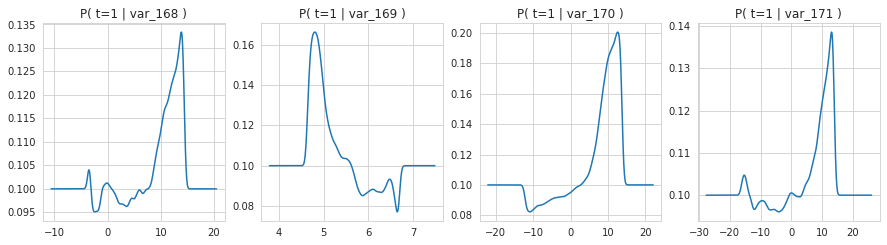

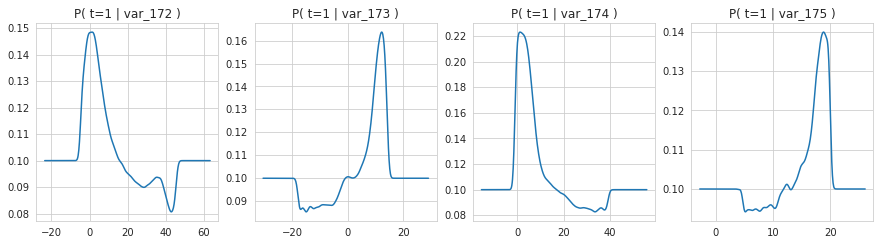

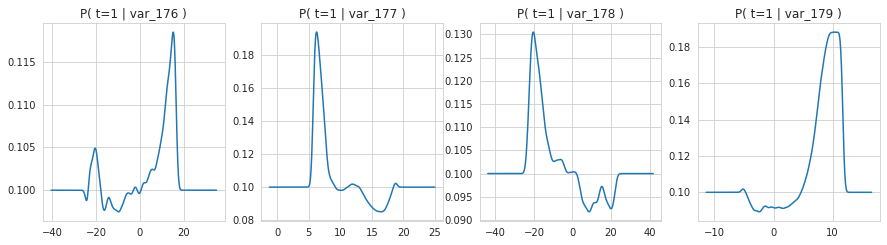

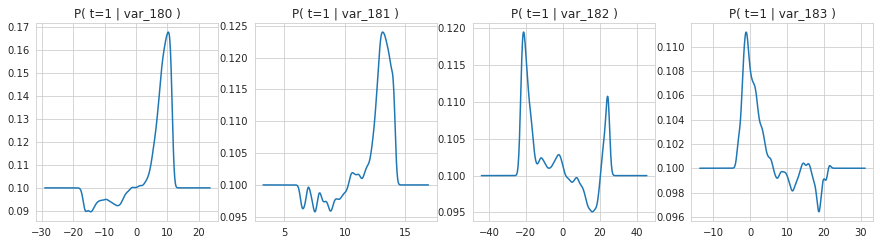

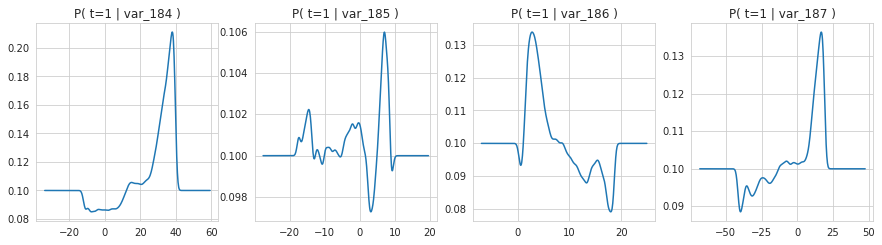

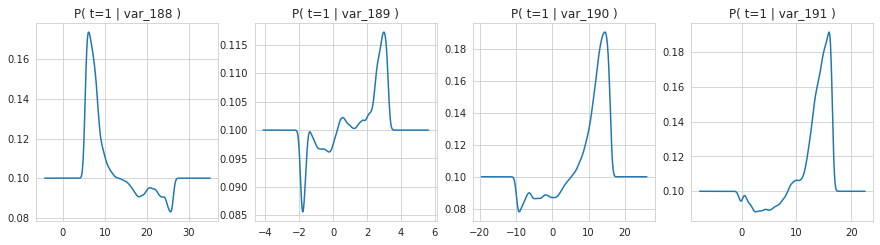

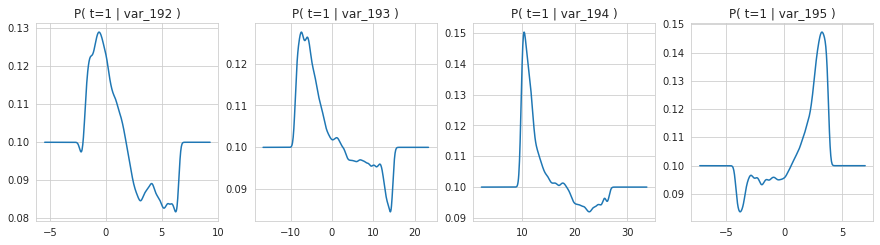

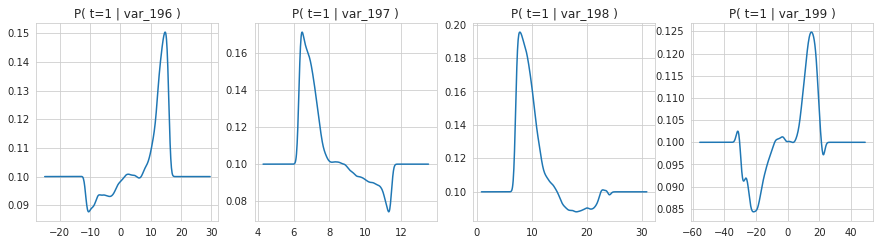

In [ ]:
#Reference (Deotte, 2019)
##Displays the corresponding target densities for the calculated probability functions using the matplotlib library.

# Draw plots yes or no?
Picture = True

# Data has a Z-Score range of -4.5 to 4.5
# Sets the min and max values of the range over which the probability function of a continuous variable will be calculated.
rmin=-5; rmax=5; 

# Sets the number of bins to use when calculating the probability function of a continuous variable. 
# The number of bins determines the resolution of the probability function, with a higher number of bins resulting in a more detailed and accurate function.
# Calculate the Probabilities for 500 bins
res=501

# Create variables to store probabilities in pr and smoothed probabilities in xr
pr = 0.1 * np.ones((200,res))
pr2 = pr.copy()
xr = np.zeros((200,res))
xr2 = xr.copy()
ct2 = 0

#Plot the probability function
for j in range(50):
    plt.figure(figsize=(15,8))
    for v in range(4):
        ct = 0
        # Calculate probability functions for feature variables
        for i in np.linspace(rmin,rmax,res):
            pr[v+4*j,ct] = probability(v+4*j,mean[v+4*j]+i*std[v+4*j])
            xr[v+4*j,ct] = mean[v+4*j]+i*std[v+4*j]
            xr2[v+4*j,ct] = i
            ct += 1
        if Picture:
            #Smooth the function for prettier display
            pr2[v+4*j,:] = smooth(pr[v+4*j,:],res//10)
            # Display probability functions
            plt.subplot(2, 4, ct2%4+5)
            plt.plot(xr[v+4*j,:],pr2[v+4*j,:],'-')
            plt.title('P( t=1 | var_'+str(v+4*j)+' )')
            xx = plt.xlim()
        ct2 += 1
    plt.show()

**Answer 1.14:** In these graphs of the probability functions we can see now for each feature variable where the probability for buying is the highest or the lowest. This can really help us when we do the feature engineering.

**Resources:**

* Deotte, C. (2019, 13. April). Modified Naive Bayes - Santander - [0.899]. Kaggle. Retrieved 20. December 2022, from https://www.kaggle.com/code/cdeotte/modified-naive-bayes-santander-0-899/notebook?utm_source=pocket_saves

* Ghosh, A. (2021, 12. Dezember). Santander Customer Transaction Prediction : A Simple Machine Learning Solution. Medium. Retrieved 20. December 2022, from https://medium.com/@aganirbanghosh007/santander-customer-transaction-prediction-a-simple-machine-learning-solution-771613633843

* Kuriminisetty, H. (2021, 23. April). GitHub - HarshithaKuriminisetty/Santander-Customer-Transaction-Prediction. GitHub. Retrieved 20. December 2022, from https://github.com/HarshithaKuriminisetty/Santander-Customer-Transaction-Prediction

* Nandepu, R. (2021, 12. Dezember). Santander Customer Transaction Prediction: An End to End Machine Learning Project. Medium. Retrieved 20. December 2022, from https://medium.com/analytics-vidhya/santander-customer-transaction-prediction-an-end-to-end-machine-learning-project-2cb763172f8a

* Onodera, K. (2019, 30. Mai). GitHub - KazukiOnodera/Santander-Customer-Transaction-Prediction: 2nd Place Solution. GitHub. Retrieved 20. December 2022, from https://github.com/KazukiOnodera/Santander-Customer-Transaction-Prediction

* Preda, G. (2019, 3. April). Santander EDA and Prediction. Kaggle. Retrieved 20. December 2022, from https://www.kaggle.com/code/gpreda/santander-eda-and-prediction/notebook

* Raimondi, F. (o. D.). Exploratory Data Analysis - Santander Customer Transaction Prediction. Retrieved 20. December 2022, from https://federicoraimondi.github.io/myProjects/Santander_Customer_Transaction_Prediction/Exploratory_Data_Analysis/Data%20Exploration.html









